###  **About Dataset**

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

### **Data Set Information**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

There are two datasets: train.csv with all examples (32950) and 21 inputs including the target feature, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

test.csv which is the test data that consists of 8238 observations and 20 features without the target feature

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

The dataset contains train and test data. Features of train data are listed below. And the test data have already been preprocessed.

### Features

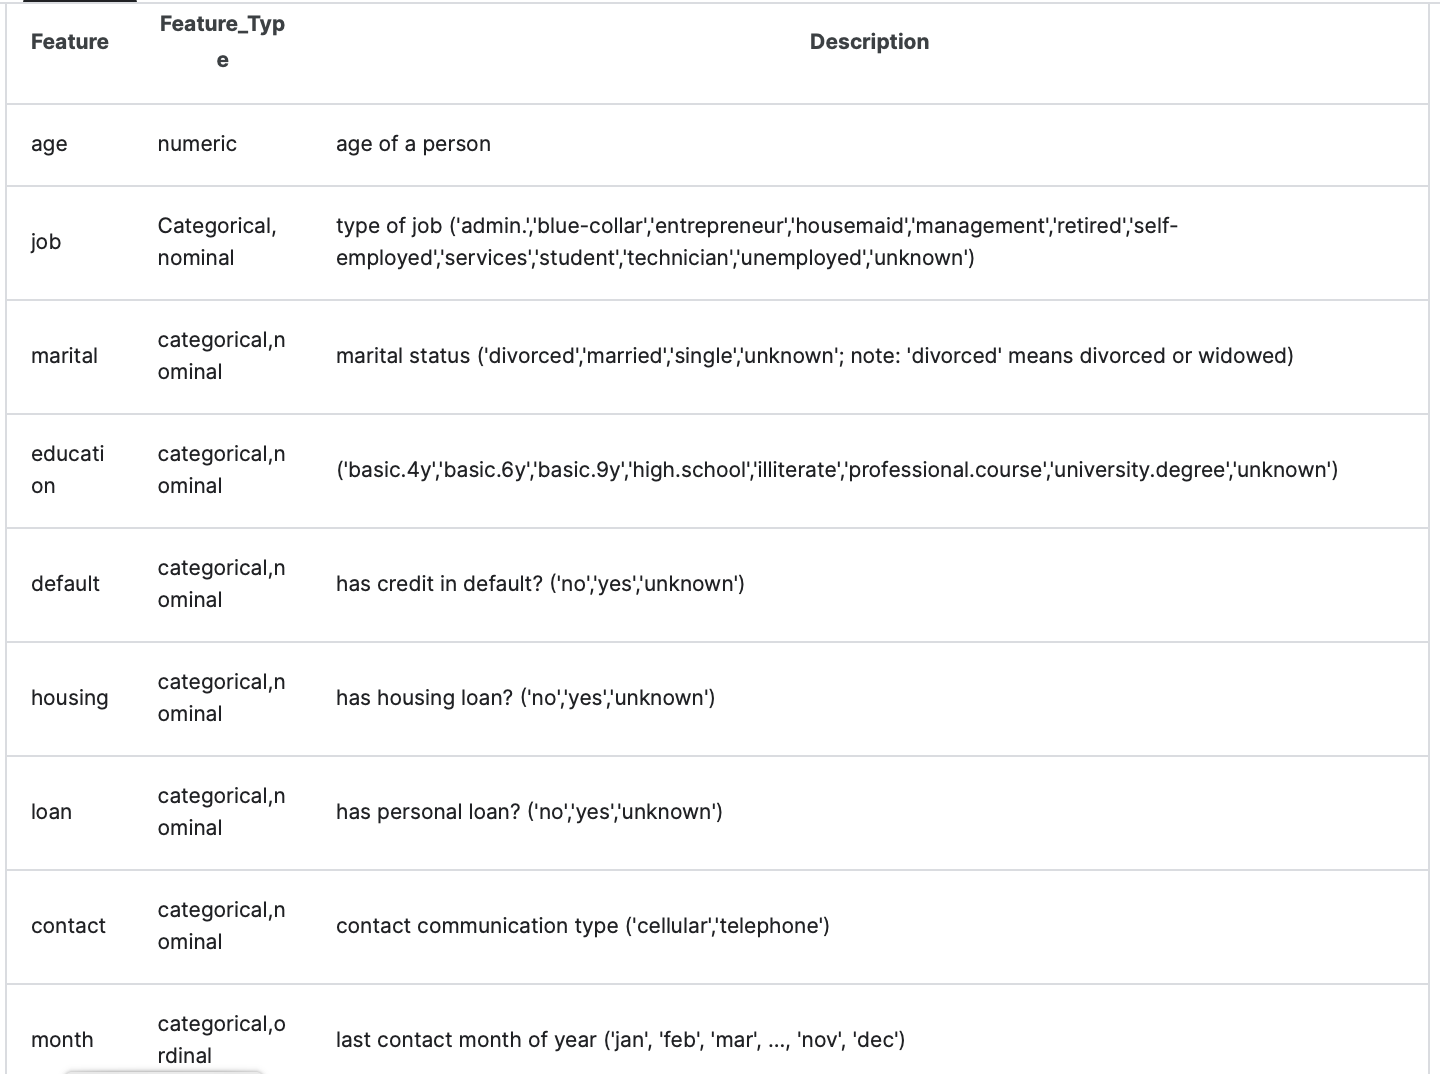

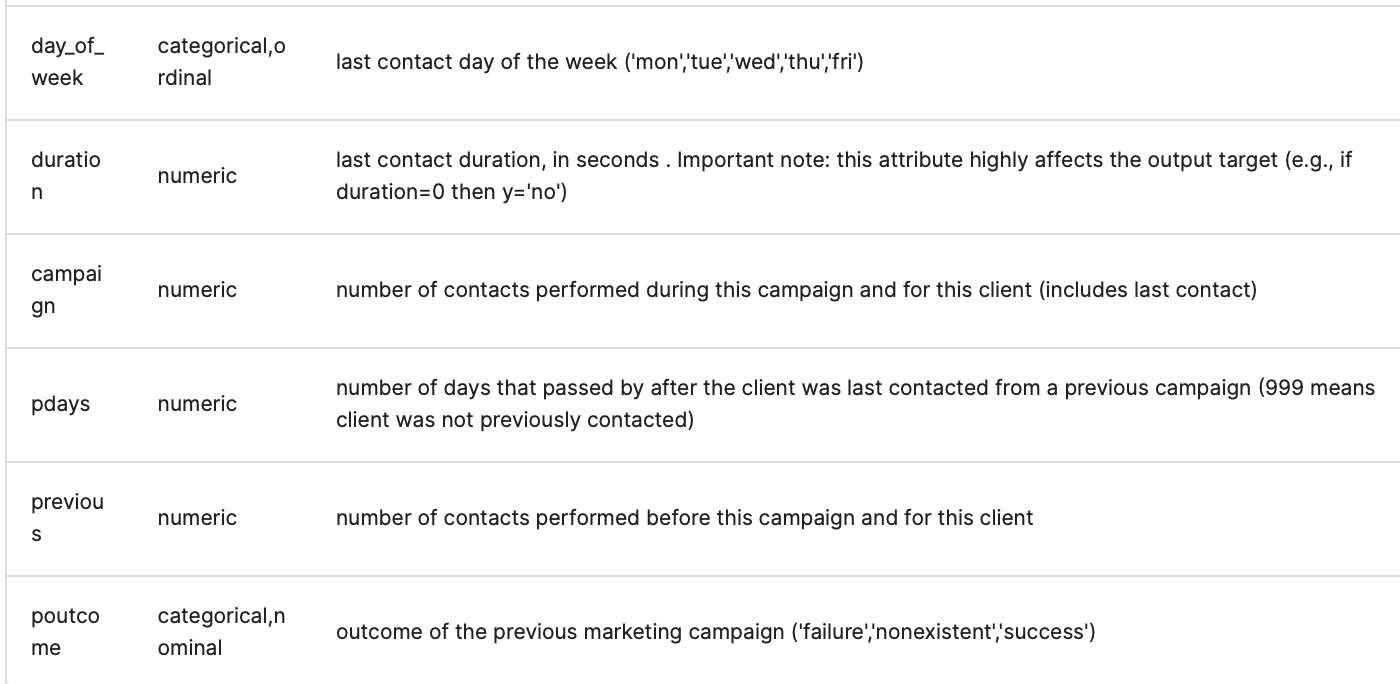

## Target variable:

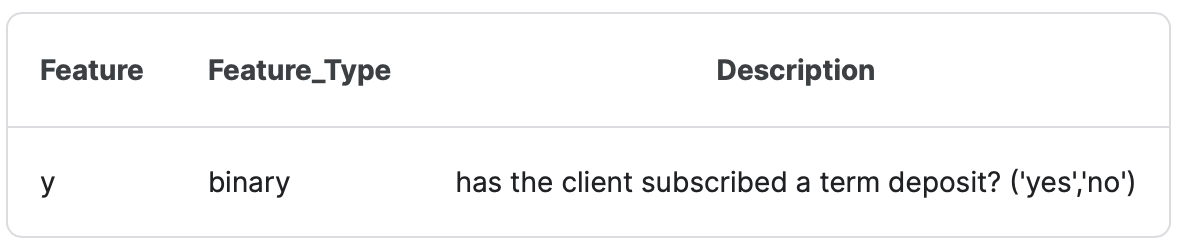

In [1]:
# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Importing the data

In [2]:
df = pd.read_csv(r'new_train.csv')
df.head()

age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexistent   no  
4  nonexistent   no

## Data Study

In [3]:
print(f'Shape of dataset: {df.shape}')

Shape of dataset: (32950, 16)


In [4]:
print(f'Columns in the dataset: {list(df.columns)}')

Columns in the dataset: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [5]:
#Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [6]:
# finding the number of duplicates
print(f'Number of duplicates : {df.duplicated().sum()}')

Number of duplicates : 8


In [7]:
df[df.duplicated() == True]

age          job   marital            education  default housing loan  \
1923    39       admin.   married    university.degree       no      no   no   
12252   36      retired   married              unknown       no      no   no   
20067   35       admin.   married    university.degree       no     yes   no   
24831   41   technician   married  professional.course       no     yes   no   
28456   55     services   married          high.school  unknown      no   no   
29543   47   technician  divorced          high.school       no     yes   no   
30807   71      retired    single    university.degree       no      no   no   
32607   39  blue-collar   married             basic.6y       no      no   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
1923    cellular   nov         tue       123         2    999         0   
12252  telephone   jul         thu        88         1    999         0   
20067   cellular   may         fri       348         4    999         0   
24831   cellular   aug         tue       127         1    999         0   
28456   cellular   aug         mon        33         1    999         0   
29543   cellular   jul         thu        43         3    999         0   
30807  telephone   oct         tue       120         1    999         0   
32607  telephone   may         thu       124         1    999         0   

          poutcome   y  
1923   nonexistent  no  
12252  nonexistent  no  
20067  nonexistent  no  
24831  nonexistent  no  
28456  nonexistent  no  
29543  nonexistent  no  
30807  nonexistent  no  
32607  nonexistent  no

In [8]:
#dropping the duplicate data
df = df.drop_duplicates()

In [9]:
print(f'Shape of dataset after dropping duplicates: {df.shape}')

Shape of dataset after dropping duplicates: (32942, 16)


In [10]:
#Resetting the index
df = df.reset_index(drop=True)

In [11]:
# changing duration of call from seconds to minutes for easy understanding
df['duration'] = df['duration'].apply(lambda x: round(x/60,2))

In [12]:
# Number of unique values in each column
for i in df.columns:
    print(f'No of unique value in {i} is: {df[i].nunique()}')

No of unique value in age is: 75
No of unique value in job is: 12
No of unique value in marital is: 4
No of unique value in education is: 8
No of unique value in default is: 3
No of unique value in housing is: 3
No of unique value in loan is: 3
No of unique value in contact is: 2
No of unique value in month is: 10
No of unique value in day_of_week is: 5
No of unique value in duration is: 1467
No of unique value in campaign is: 40
No of unique value in pdays is: 27
No of unique value in previous is: 8
No of unique value in poutcome is: 3
No of unique value in y is: 2


In [13]:
# Value counts of each feature
for i in df.columns:
    print(f'Value counts in {i} are: \n{df[i].value_counts()}')
    print('*'*100)

Value counts in age are: 
31    1551
32    1474
33    1443
35    1416
34    1404
      ... 
17       3
89       2
87       1
91       1
98       1
Name: age, Length: 75, dtype: int64
****************************************************************************************************
Value counts in job are: 
admin.           8312
blue-collar      7440
technician       5398
services         3195
management       2345
retired          1364
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64
****************************************************************************************************
Value counts in marital are: 
married     19947
single       9256
divorced     3674
unknown        65
Name: marital, dtype: int64
****************************************************************************************************
Value counts in education are: 
university.degree      9733
high.schoo

In [14]:
# Unique values present in each feature
for i in df.columns:
    print(f'Unique values in {i} are: \n{df[i].unique()}')
    print('*'*100)

Unique values in age are: 
[49 37 78 36 59 29 26 30 50 33 44 32 43 56 40 47 34 46 39 41 55 38 63 23
 48 53 35 51 71 58 21 45 25 77 28 52 80 57 22 60 27 24 31 42 54 81 64 79
 20 76 82 19 68 65 73 66 85 74 61 86 69 18 83 88 70 87 84 75 62 72 67 89
 17 91 98]
****************************************************************************************************
Unique values in job are: 
['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']
****************************************************************************************************
Unique values in marital are: 
['married' 'divorced' 'single' 'unknown']
****************************************************************************************************
Unique values in education are: 
['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']
******************************************

In [15]:
df.describe(include='O')

job  marital          education default housing   loan   contact  \
count    32942    32942              32942   32942   32942  32942     32942   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq      8312    19947               9733   26000   17251  27123     20903   

        month day_of_week     poutcome      y  
count   32942       32942        32942  32942  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    11009        6854        28408  29230

In [16]:
df.describe().T

count        mean         std   min     25%    50%     75%     max
age       32942.0   40.012810   10.403035  17.0   32.00   38.0   47.00   98.00
duration  32942.0    4.302682    4.316581   0.0    1.72    3.0    5.32   81.97
campaign  32942.0    2.560804    2.752579   1.0    1.00    2.0    3.00   56.00
pdays     32942.0  962.043440  187.973035   0.0  999.00  999.0  999.00  999.00
previous  32942.0    0.174762    0.499078   0.0    0.00    0.0    0.00    7.00

In [17]:
#creating a copy of the dataframe
df1 = df.copy()
df1.head()

age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed      3.78         4    999         0   
1  telephone   nov         wed      3.37         2    999         1   
2   cellular   jul         mon     19.13         1    999         0   
3  telephone   may         mon      2.00         2    999         0   
4   cellular   jun         tue      6.13         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexistent   no  
4  nonexistent   no

## Exploratory Data Analysis (EDA)

### Univariate Analysis

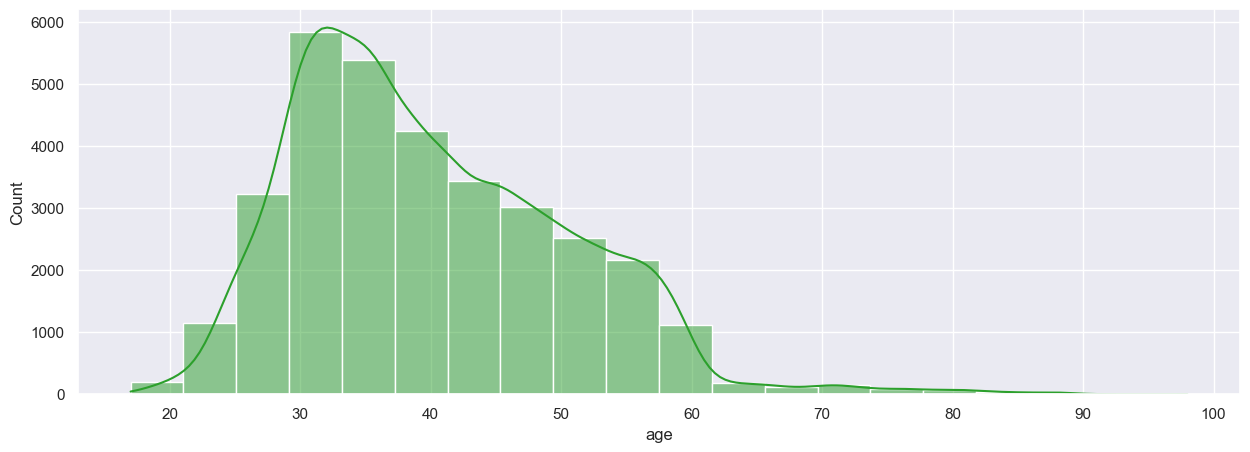

In [18]:
plt.figure(figsize = (15,5))
sns.histplot(data = df1, x = 'age',kde = True,color = 'tab:green',bins=20)
plt.show()

### Most of the customers are between the age of 30 to 40

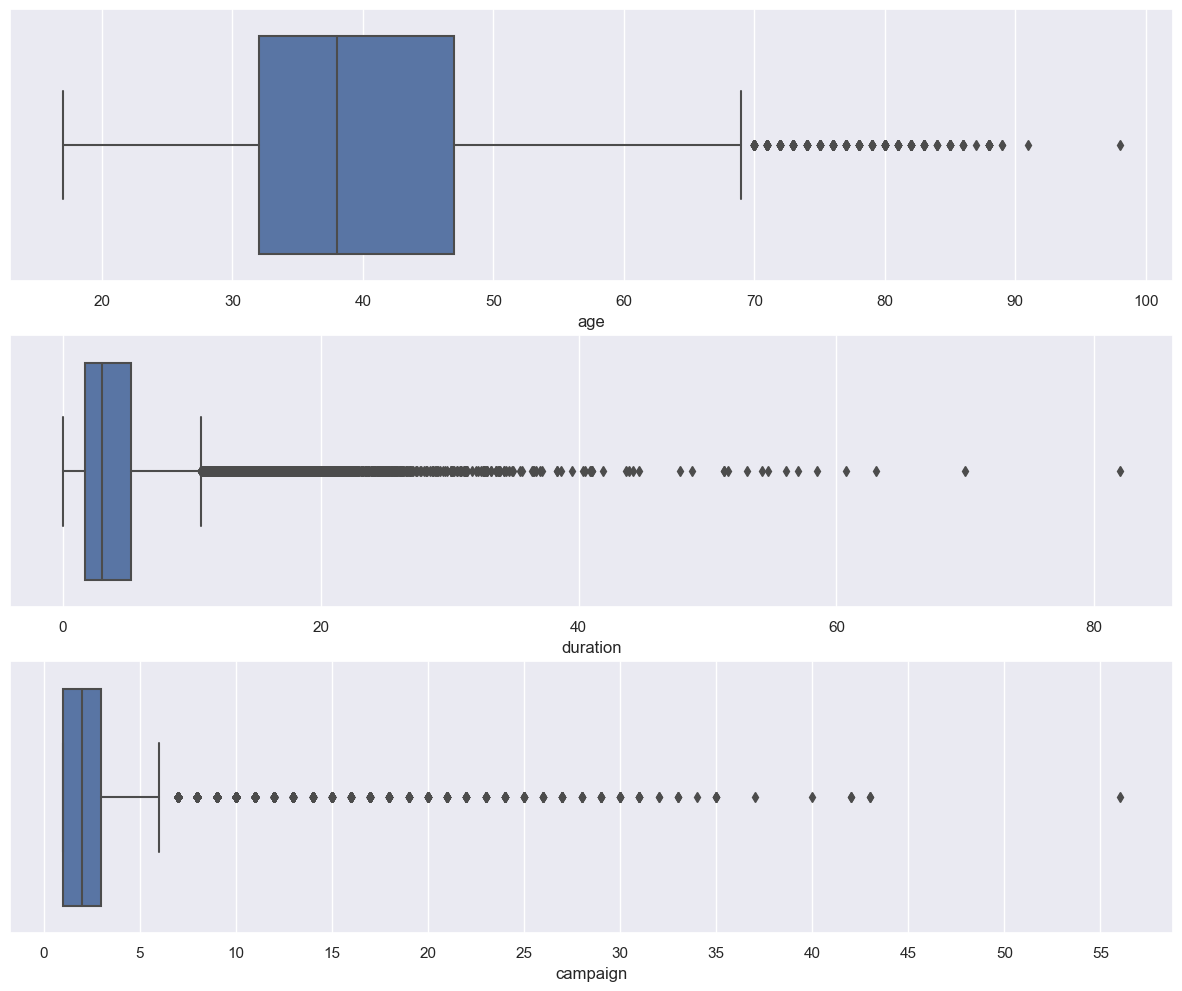

In [19]:
plt.figure(figsize = (15,12))
plt.subplot(3,1,1)
sns.boxplot(data = df1, x = 'age')
plt.subplot(3,1,2)
sns.boxplot(data = df1, x = 'duration')
plt.subplot(3,1,3)
sns.boxplot(data = df1, x = 'campaign')
plt.xticks(range(0,60,5))
plt.show()

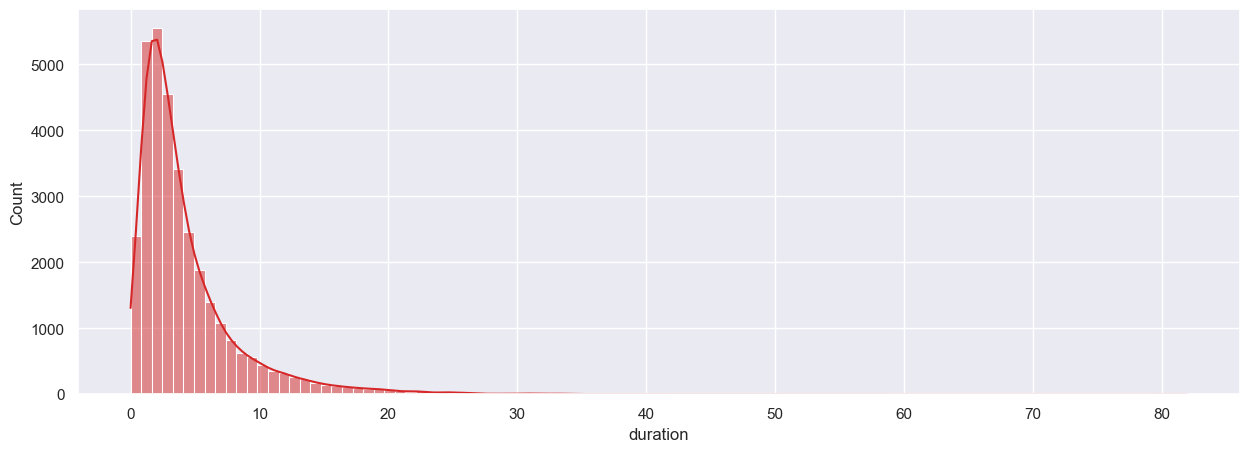

In [20]:
plt.figure(figsize = (15,5))
sns.histplot(data = df1, x = 'duration',kde = True,color = 'tab:red',bins=100)
plt.xticks(range(0,90,10))
plt.show()

### Majority of the calls made to customers are less than 10 minutes.

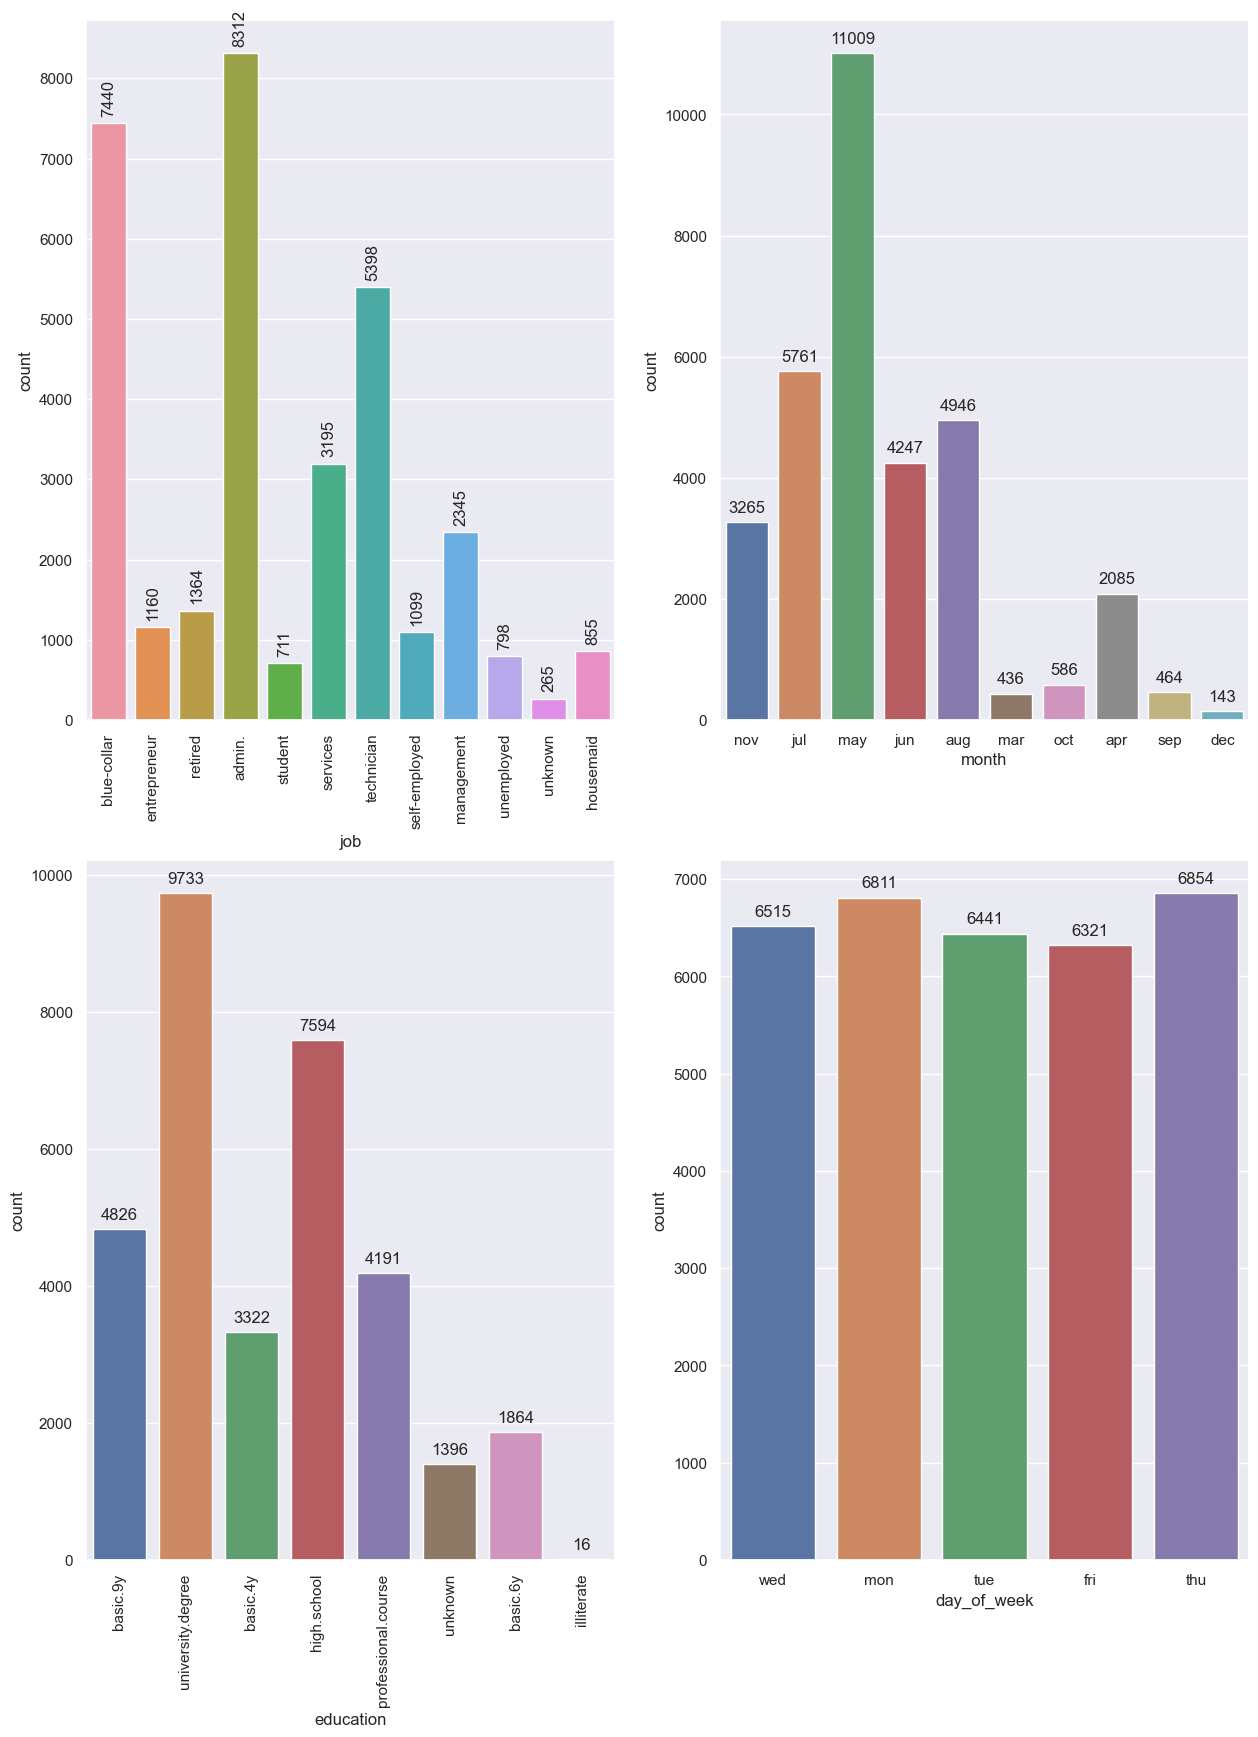

In [21]:
plt.figure(figsize = (15,20))
plt.subplot(2,2,1)
ax1 = sns.countplot(data = df1, x = 'job')
plt.xticks(rotation = 90)
ax1.bar_label(ax1.containers[0],rotation=90, padding = 5)
plt.subplot(2,2,2)
ax2 = sns.countplot(data = df1, x = 'month')
ax2.bar_label(ax2.containers[0], padding = 5)
plt.subplot(2,2,3)
ax3 = sns.countplot(data = df1, x = 'education')
plt.xticks(rotation = 90)
ax3.bar_label(ax3.containers[0], padding = 5)
plt.subplot(2,2,4)
ax4 = sns.countplot(data = df1, x = 'day_of_week')
#plt.xticks(rotation = 90)
ax4.bar_label(ax4.containers[0], padding = 5)
plt.show()

### Among the calls made to the customers most of them work in blue-collar jobs and administration.
### Most calls are made in the month of may.
### University degree holders were contacted the most.
### Almost around 6K to 7K calls were made each working day.

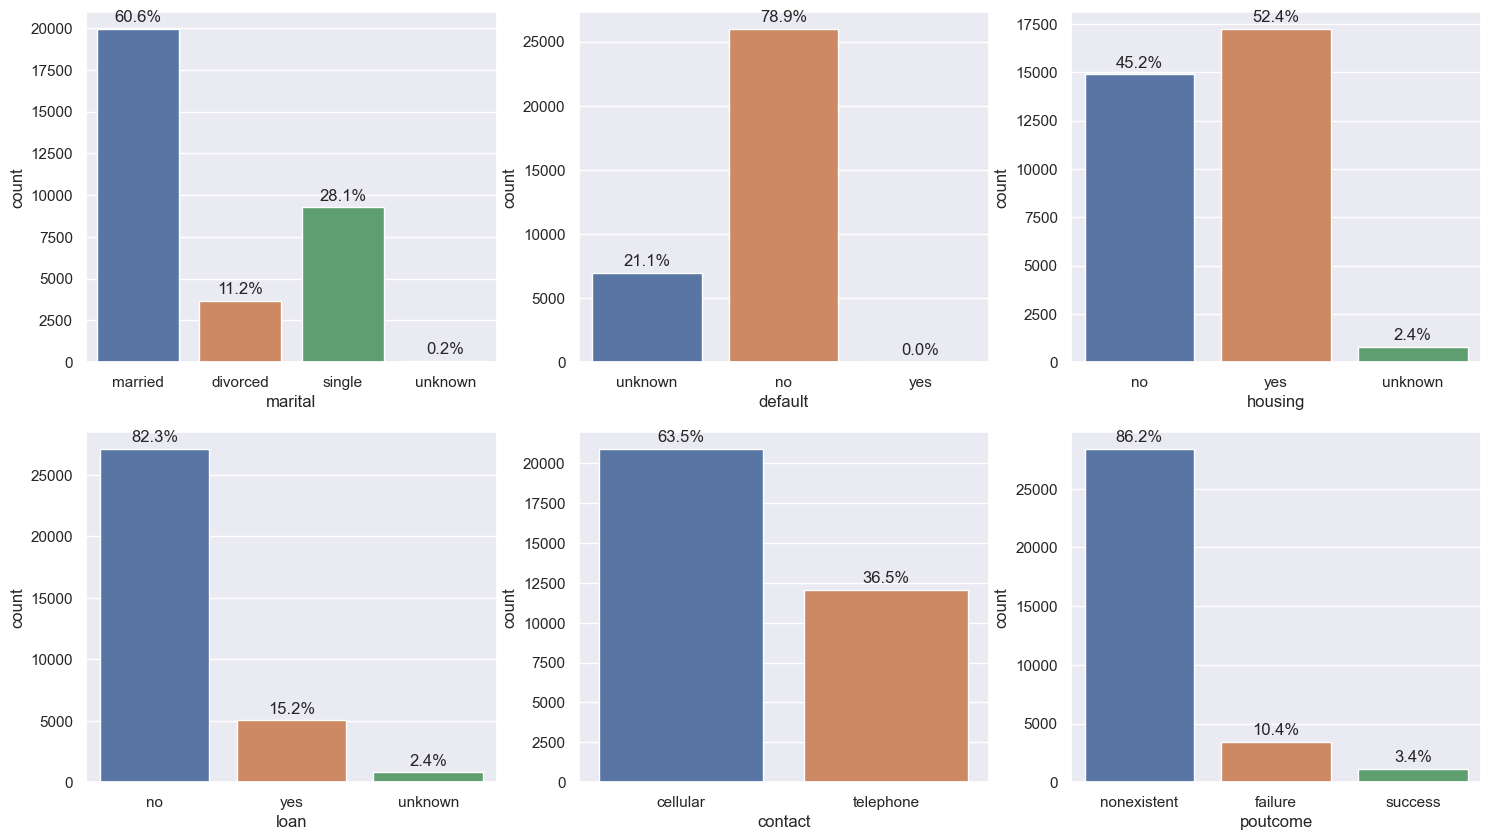

In [22]:
plt.figure(figsize = (18,10))
plt.subplot(2,3,1)
ax1 = sns.countplot(data = df1, x = 'marital')
ax1.bar_label(ax1.containers[0], padding = 3, fmt = lambda x: f'{(x/df1["marital"].count())*100:0.1f}%')

plt.subplot(2,3,2)
ax2 = sns.countplot(data = df1, x = 'default')
ax2.bar_label(ax2.containers[0], padding = 3, fmt = lambda x: f'{(x/df1["default"].count())*100:0.1f}%')

plt.subplot(2,3,3)
ax3 = sns.countplot(data = df1, x = 'housing')
ax3.bar_label(ax3.containers[0], padding = 3, fmt = lambda x: f'{(x/df1["housing"].count())*100:0.1f}%')

plt.subplot(2,3,4)
ax4 = sns.countplot(data = df1, x = 'loan')
ax4.bar_label(ax4.containers[0], padding = 3, fmt = lambda x: f'{(x/df1["loan"].count())*100:0.1f}%')

plt.subplot(2,3,5)
ax5 = sns.countplot(data = df1, x = 'contact')
ax5.bar_label(ax5.containers[0], padding = 3, fmt = lambda x: f'{(x/df1["contact"].count())*100:0.1f}%')

plt.subplot(2,3,6)
ax6 = sns.countplot(data = df1, x = 'poutcome')
ax6.bar_label(ax6.containers[0], padding = 3, fmt = lambda x: f'{(x/df1["poutcome"].count())*100:0.1f}%')
plt.show()

### --> Married persons are around 60.6% of the people contacted for this campaign
### --> Most of the people contacted are not defaulters (78.9%), whereas there are 21.1% who are.
### --> Around 52.4% of the people contacted have availed housing loan, whereas only 15.2% of them have took personal loans.
### --> 63.5% of the people were contacted via cellular whereas 36.5% were contacted via telephone
### --> If we focus on the previous outcome of the campaign done, only 3.4% of the contact made have said yes to the term deposit. But if we look at the data carefully, amost 86.2% of the people are mentioned non-existent, which means that they are all new customers.

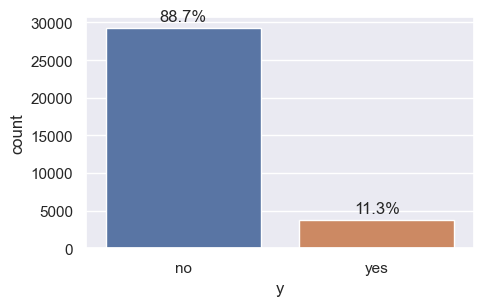

In [23]:
plt.figure(figsize = (5,3))
ax = sns.countplot(data = df1, x = 'y')
ax.bar_label(ax.containers[0], padding = 3, fmt = lambda x: f'{(x/df1["y"].count())*100:0.1f}%')
plt.show()

### We could tell from the above visual that about 88.7% of the customers have not opted the term deposit while only 11.3% have opted for it.

### So clearly we have an imbalanced dataset

In [24]:
df1['y'].value_counts(normalize = True)

no     0.887317
yes    0.112683
Name: y, dtype: float64

## Bi-variate & Multi-variate Analysis

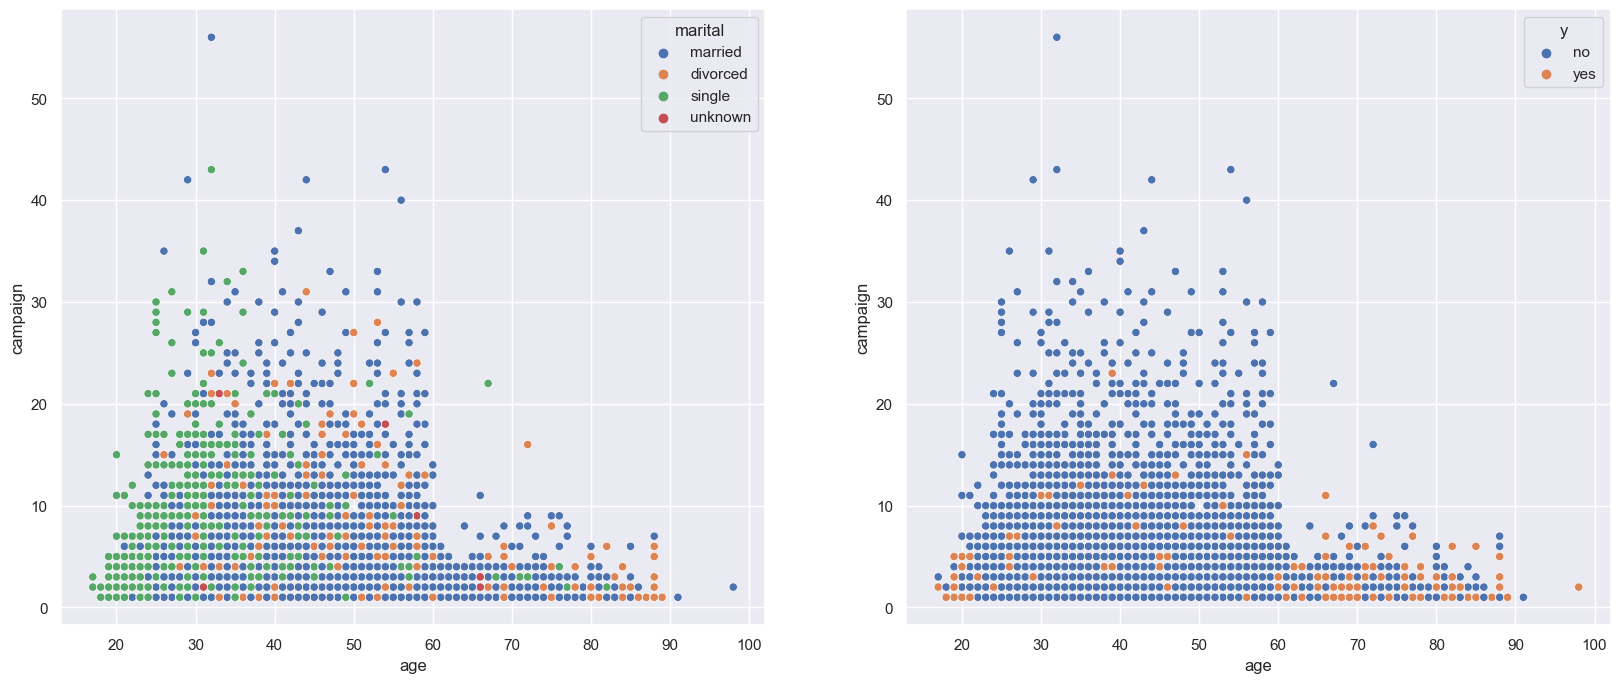

In [25]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(df1, x = 'age', y = 'campaign', hue = 'marital')
plt.subplot(1,2,2)
sns.scatterplot(df1, x = 'age', y = 'campaign', hue = 'y')
plt.show()

### Between the age of 25 to 60, more number of contacts were made, among which married people are the most contacted customers. Eventhough they have been contacted more, only the people who were contacted less than 15 times have opted for the term deposit.

### In the ages between 60 to 90, less number of contacts have been made and more customers have opted for the term deposit.

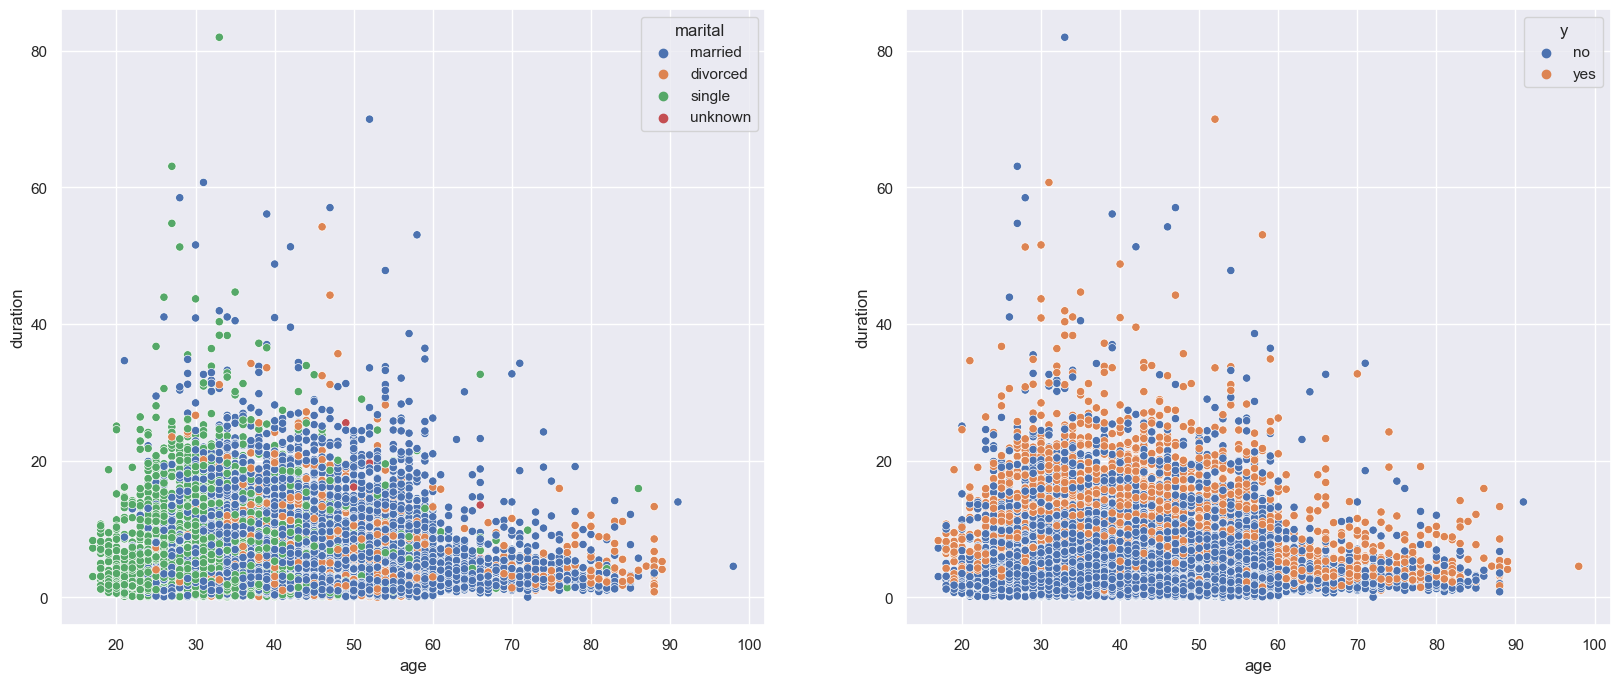

In [26]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(df1, x = 'age', y = 'duration', hue = 'marital')
plt.subplot(1,2,2)
sns.scatterplot(df1, x = 'age', y = 'duration', hue = 'y')
plt.show()

### If we see in terms of duration of the calls made, more time has been spent to speak with the customers between the age of 20 to 60
### Most of the customers who spent 15 to 25 minutes in the 20-60 age band have opted for the term deposit whereas in the age band of 60-90, most customers who have opted for the term deposit have spent only less than 10 minutes in the call.

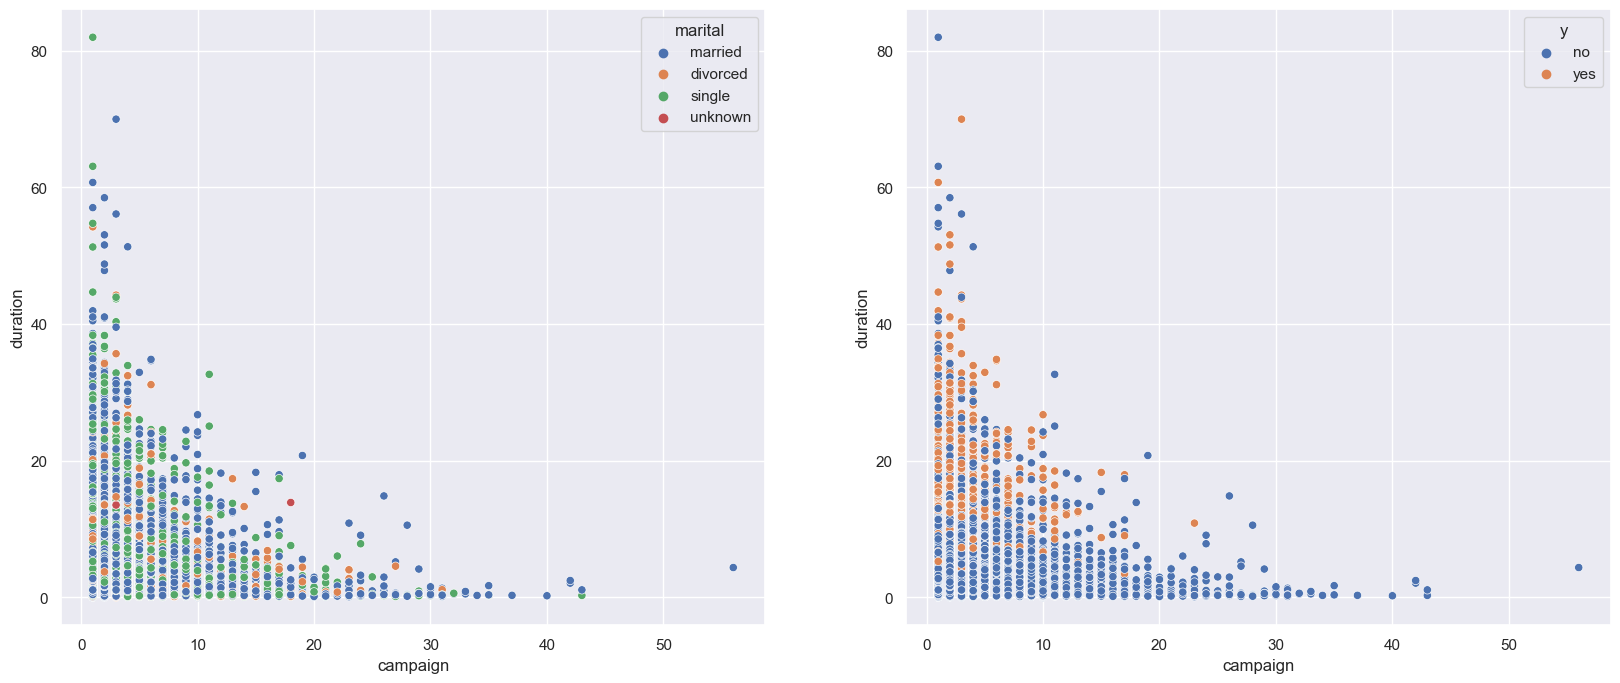

In [27]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(df1, x = 'campaign', y = 'duration', hue = 'marital')
plt.subplot(1,2,2)
sns.scatterplot(df1, x = 'campaign', y = 'duration', hue = 'y')
plt.show()

### As the number of contacts increases, the duration of the call decreases. More time has been spent during the first 10 contacts that were made to the customers.

### People who have opted for the term deposit have said yes within 10 contacts made with them.

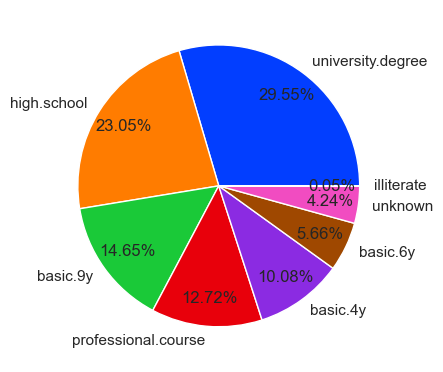

In [28]:
list1 = list(df1['education'].value_counts(normalize = True))
plt.figure(figsize = (10,7))
plt.subplot(1,2,1)
plt.pie(df1['education'].value_counts(), labels = df1['education'].value_counts().index,
        autopct='%.2f%%',pctdistance=0.8, labeldistance=1.1, rotatelabels=False,
        colors = sns.color_palette('bright'))
plt.show()

### University degree holders are of majority who have been contacted followed by high school graduates. 

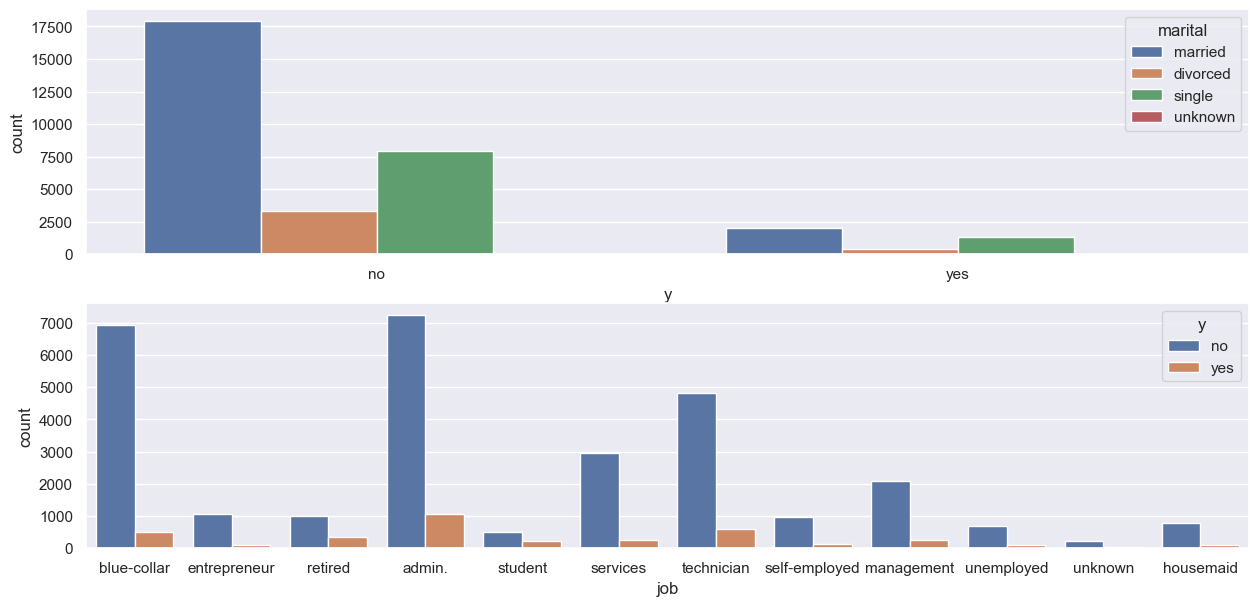

In [29]:
plt.figure(figsize = (15,7))
plt.subplot(2,1,1)
sns.countplot(data = df1, x = 'y',  hue = 'marital')
plt.subplot(2,1,2)
sns.countplot(data = df1, x = 'job',  hue = 'y')
plt.show()

### Mostly married people have opted for the term deposit followed by single, then divorced customers.
### Among the people who signed up for the term deposit, most were having admin job.

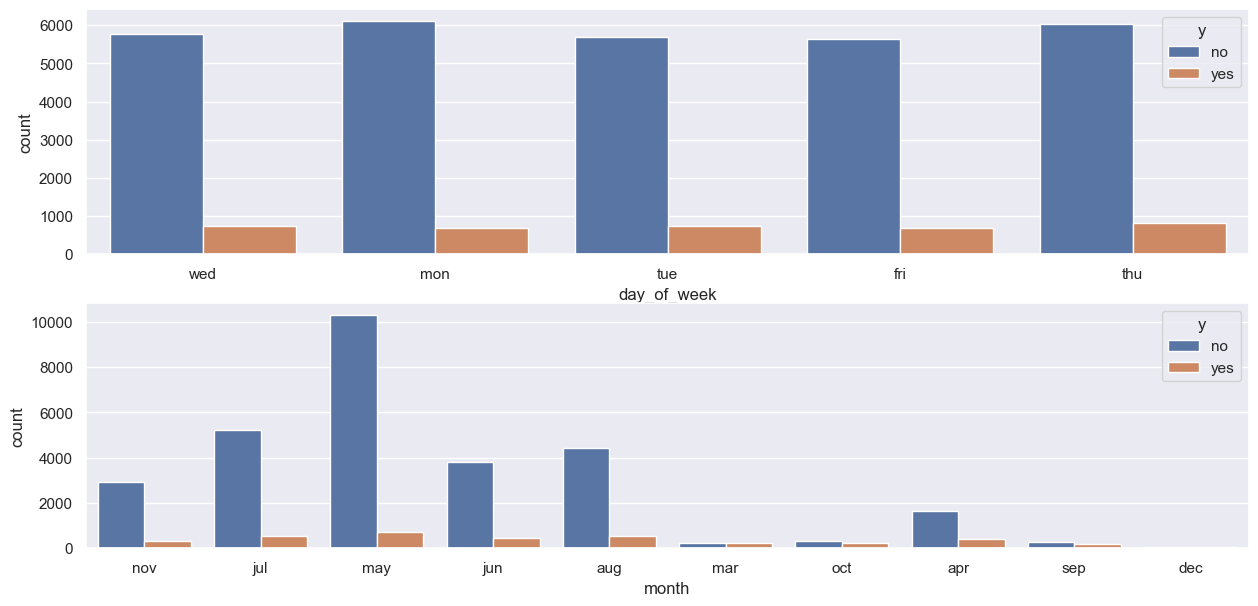

In [30]:
plt.figure(figsize = (15,7))
plt.subplot(2,1,1)
sns.countplot(data = df1, x = 'day_of_week',  hue = 'y')
plt.subplot(2,1,2)
sns.countplot(data = df1, x = 'month',  hue = 'y')
plt.show()

### Almost equal number of customers have signed up for the term deposit on all weekdays
### As most people were contacted in the month of May, the number of people who signed up is high in the month of May.

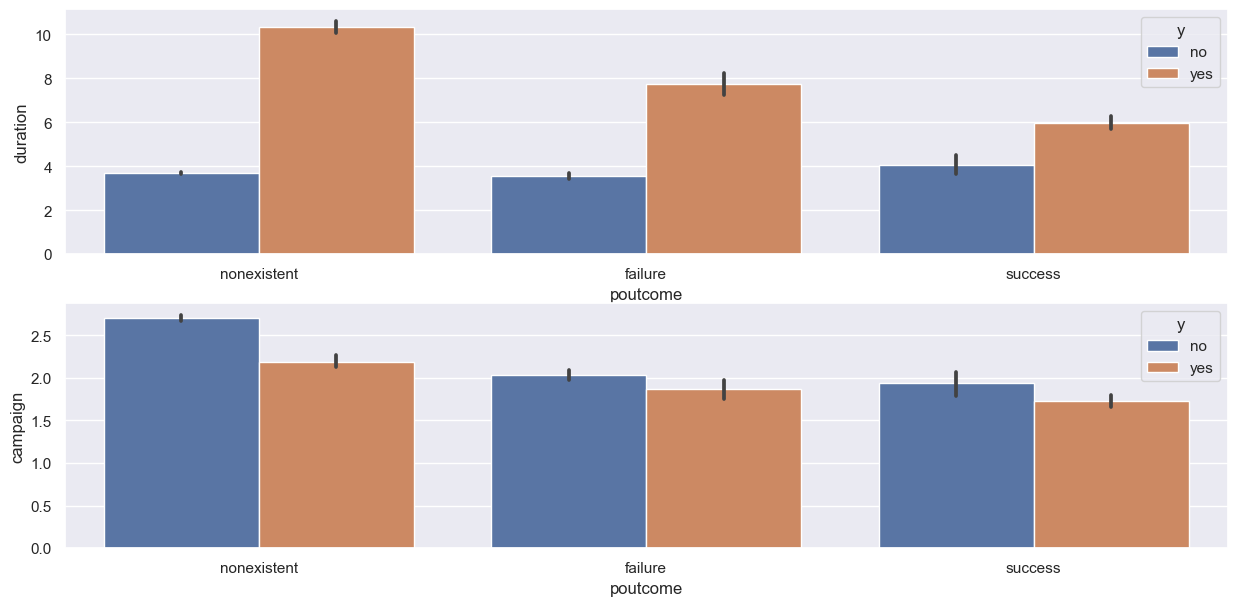

In [31]:
plt.figure(figsize = (15,7))
plt.subplot(2,1,1)
sns.barplot(data = df1, x = 'poutcome', y = 'duration', hue = 'y')
plt.subplot(2,1,2)
sns.barplot(data = df1, x = 'poutcome', y = 'campaign', hue = 'y')
plt.show()

### If we look at the outcome of previous campaign, for whom the campaign was a success, they have spent less time in the call compared to others when opting for the term deposit.
### Similary the number of attempts made to contact them have also been less when compared to others.

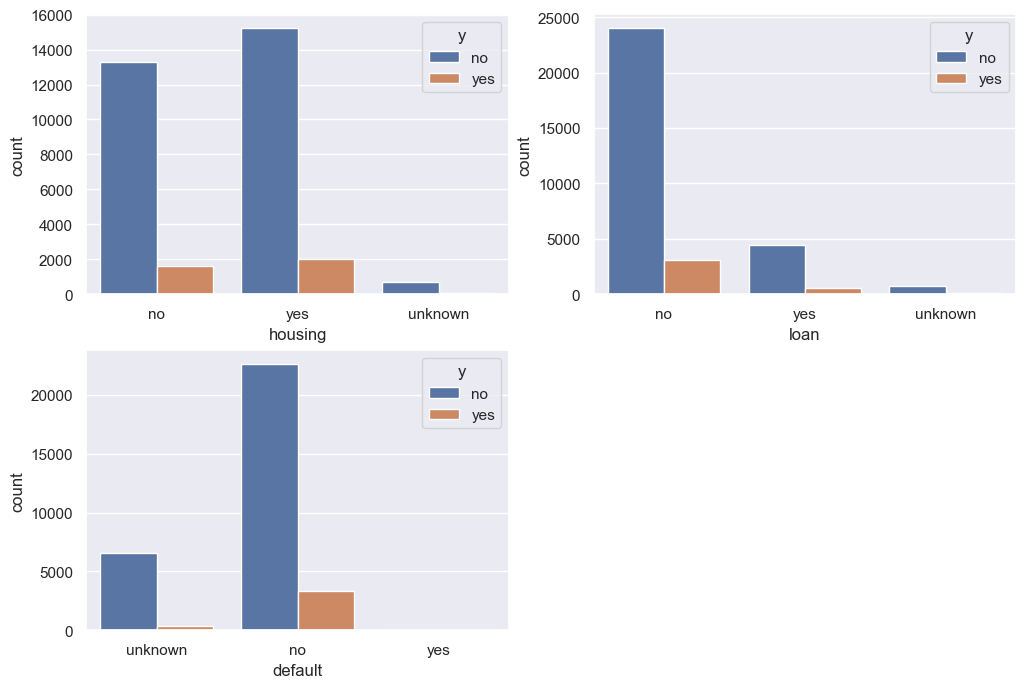

In [32]:
plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
sns.countplot(data = df1, x = 'housing',  hue = 'y')
plt.subplot(2,2,2)
sns.countplot(data = df1, x = 'loan',  hue = 'y')
plt.subplot(2,2,3)
sns.countplot(data = df1, x = 'default',  hue = 'y')
plt.show()

### Most people who opted for the term deposit have a housing loan, whereas if we see the personal loan, mostly who doesn't have a personal loan have said yes to the term deposit.
### Majority of the customers who opted for the term deposit are non defaulters.

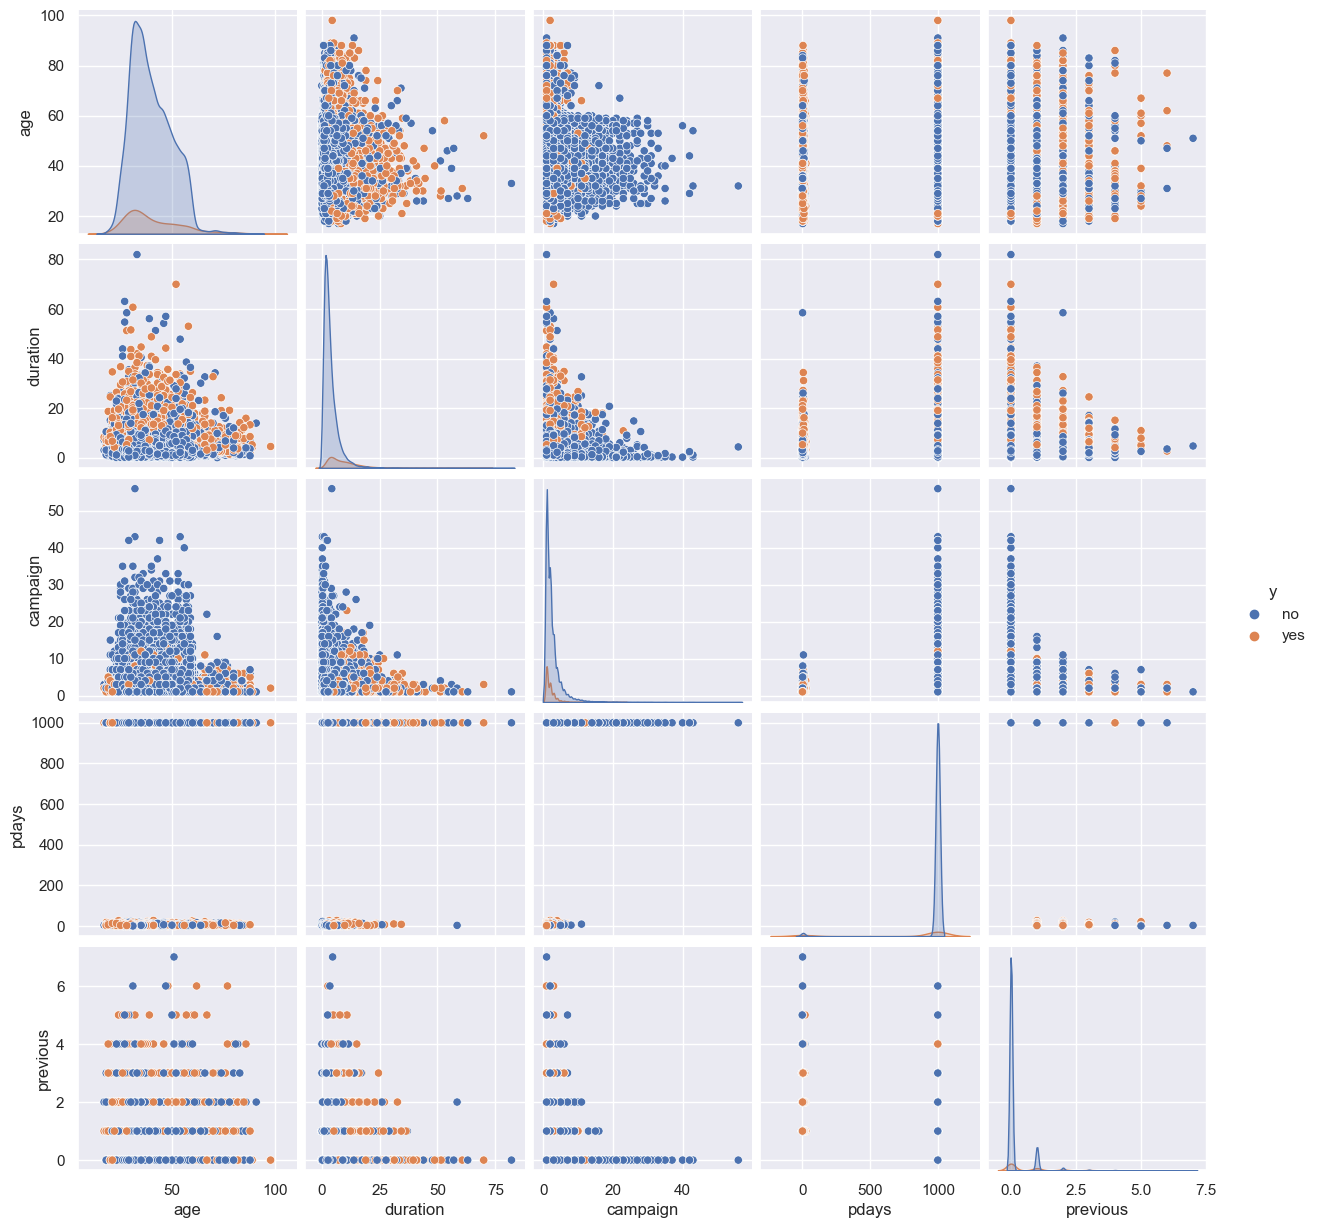

In [33]:
sns.pairplot(data = df1, hue = 'y')
plt.show()

## Data preparation

In [34]:
# Converting the target variable to numercal values
df1['y'] = np.where(df1['y'] == 'yes',1,0)

In [35]:
df1.head()

age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed      3.78         4    999         0   
1  telephone   nov         wed      3.37         2    999         1   
2   cellular   jul         mon     19.13         1    999         0   
3  telephone   may         mon      2.00         2    999         0   
4   cellular   jun         tue      6.13         2    999         0   

      poutcome  y  
0  nonexistent  0  
1      failure  0  
2  nonexistent  1  
3  nonexistent  0  
4  nonexistent  0

In [36]:
# Splitting the dependent and independent varibales
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [37]:
numerical_col = ['age','duration', 'campaign', 'pdays','previous' ]
cols_to_change = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month',
                 'day_of_week','poutcome']

In [38]:
#Converting categorical columsn to numerical values using One Hot Encoding
x = pd.get_dummies(x, columns = cols_to_change, drop_first = True)
x.head()

age  duration  campaign  pdays  previous  job_blue-collar  \
0   49      3.78         4    999         0                1   
1   37      3.37         2    999         1                0   
2   78     19.13         1    999         0                0   
3   36      2.00         2    999         0                0   
4   59      6.13         2    999         0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  ...  \
0                 0              0               0            0  ...   
1                 1              0               0            0  ...   
2                 0              0               0            1  ...   
3                 0              0               0            0  ...   
4                 0              0               0            1  ...   

   month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0          0          1          0          0                0   
1          0          1          0          0                0   
2          0          0          0          0                1   
3          1          0          0          0                1   
4          0          0          0          0                0   

   day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_nonexistent  \
0                0                0                1                     1   
1                0                0                1                     0   
2                0                0                0                     1   
3                0                0                0                     1   
4                0                1                0                     1   

   poutcome_success  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 48 columns]

In [39]:
x.describe()

age      duration      campaign         pdays      previous  \
count  32942.000000  32942.000000  32942.000000  32942.000000  32942.000000   
mean      40.012810      4.302682      2.560804    962.043440      0.174762   
std       10.403035      4.316581      2.752579    187.973035      0.499078   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000      1.720000      1.000000    999.000000      0.000000   
50%       38.000000      3.000000      2.000000    999.000000      0.000000   
75%       47.000000      5.320000      3.000000    999.000000      0.000000   
max       98.000000     81.970000     56.000000    999.000000      7.000000   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
count     32942.000000      32942.000000   32942.000000    32942.000000   
mean          0.225851          0.035213       0.025955        0.071186   
std           0.418148          0.184322       0.159003        0.257139   
min           0.000000          0.000000       0.000000        0.000000   
25%           0.000000          0.000000       0.000000        0.000000   
50%           0.000000          0.000000       0.000000        0.000000   
75%           0.000000          0.000000       0.000000        0.000000   
max           1.000000          1.000000       1.000000        1.000000   

        job_retired  ...     month_may     month_nov     month_oct  \
count  32942.000000  ...  32942.000000  32942.000000  32942.000000   
mean       0.041406  ...      0.334193      0.099114      0.017789   
std        0.199231  ...      0.471715      0.298819      0.132185   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      1.000000      0.000000      0.000000   
max        1.000000  ...      1.000000      1.000000      1.000000   

          month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
count  32942.000000     32942.000000     32942.000000     32942.000000   
mean       0.014085         0.206757         0.208063         0.195525   
std        0.117845         0.404986         0.405928         0.396611   
min        0.000000         0.000000         0.000000         0.000000   
25%        0.000000         0.000000         0.000000         0.000000   
50%        0.000000         0.000000         0.000000         0.000000   
75%        0.000000         0.000000         0.000000         0.000000   
max        1.000000         1.000000         1.000000         1.000000   

       day_of_week_wed  poutcome_nonexistent  poutcome_success  
count     32942.000000          32942.000000      32942.000000  
mean          0.197772              0.862364          0.033544  
std           0.398325              0.344523          0.180054  
min           0.000000              0.000000          0.000000  
25%           0.000000              1.000000          0.000000  
50%           0.000000              1.000000          0.000000  
75%           0.000000              1.000000          0.000000  
max           1.000000              1.000000          1.000000  

[8 rows x 48 columns]

### Feature scaling

In [40]:
# Standardising the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x = ['age','duration', 'campaign', 'pdays','previous']
x[scaler_x] = scaler.fit_transform(x[scaler_x])

In [41]:
x.head()

age  duration  campaign     pdays  previous  job_blue-collar  \
0  0.863914 -0.121089  0.522862  0.196609 -0.350175                1   
1 -0.289613 -0.216073 -0.203741  0.196609  1.653552                0   
2  3.651604  3.435021 -0.567042  0.196609 -0.350175                0   
3 -0.385740 -0.533459 -0.203741  0.196609 -0.350175                0   
4  1.825186  0.423332 -0.203741  0.196609 -0.350175                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  ...  \
0                 0              0               0            0  ...   
1                 1              0               0            0  ...   
2                 0              0               0            1  ...   
3                 0              0               0            0  ...   
4                 0              0               0            1  ...   

   month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0          0          1          0          0                0   
1          0          1          0          0                0   
2          0          0          0          0                1   
3          1          0          0          0                1   
4          0          0          0          0                0   

   day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_nonexistent  \
0                0                0                1                     1   
1                0                0                1                     0   
2                0                0                0                     1   
3                0                0                0                     1   
4                0                1                0                     1   

   poutcome_success  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 48 columns]

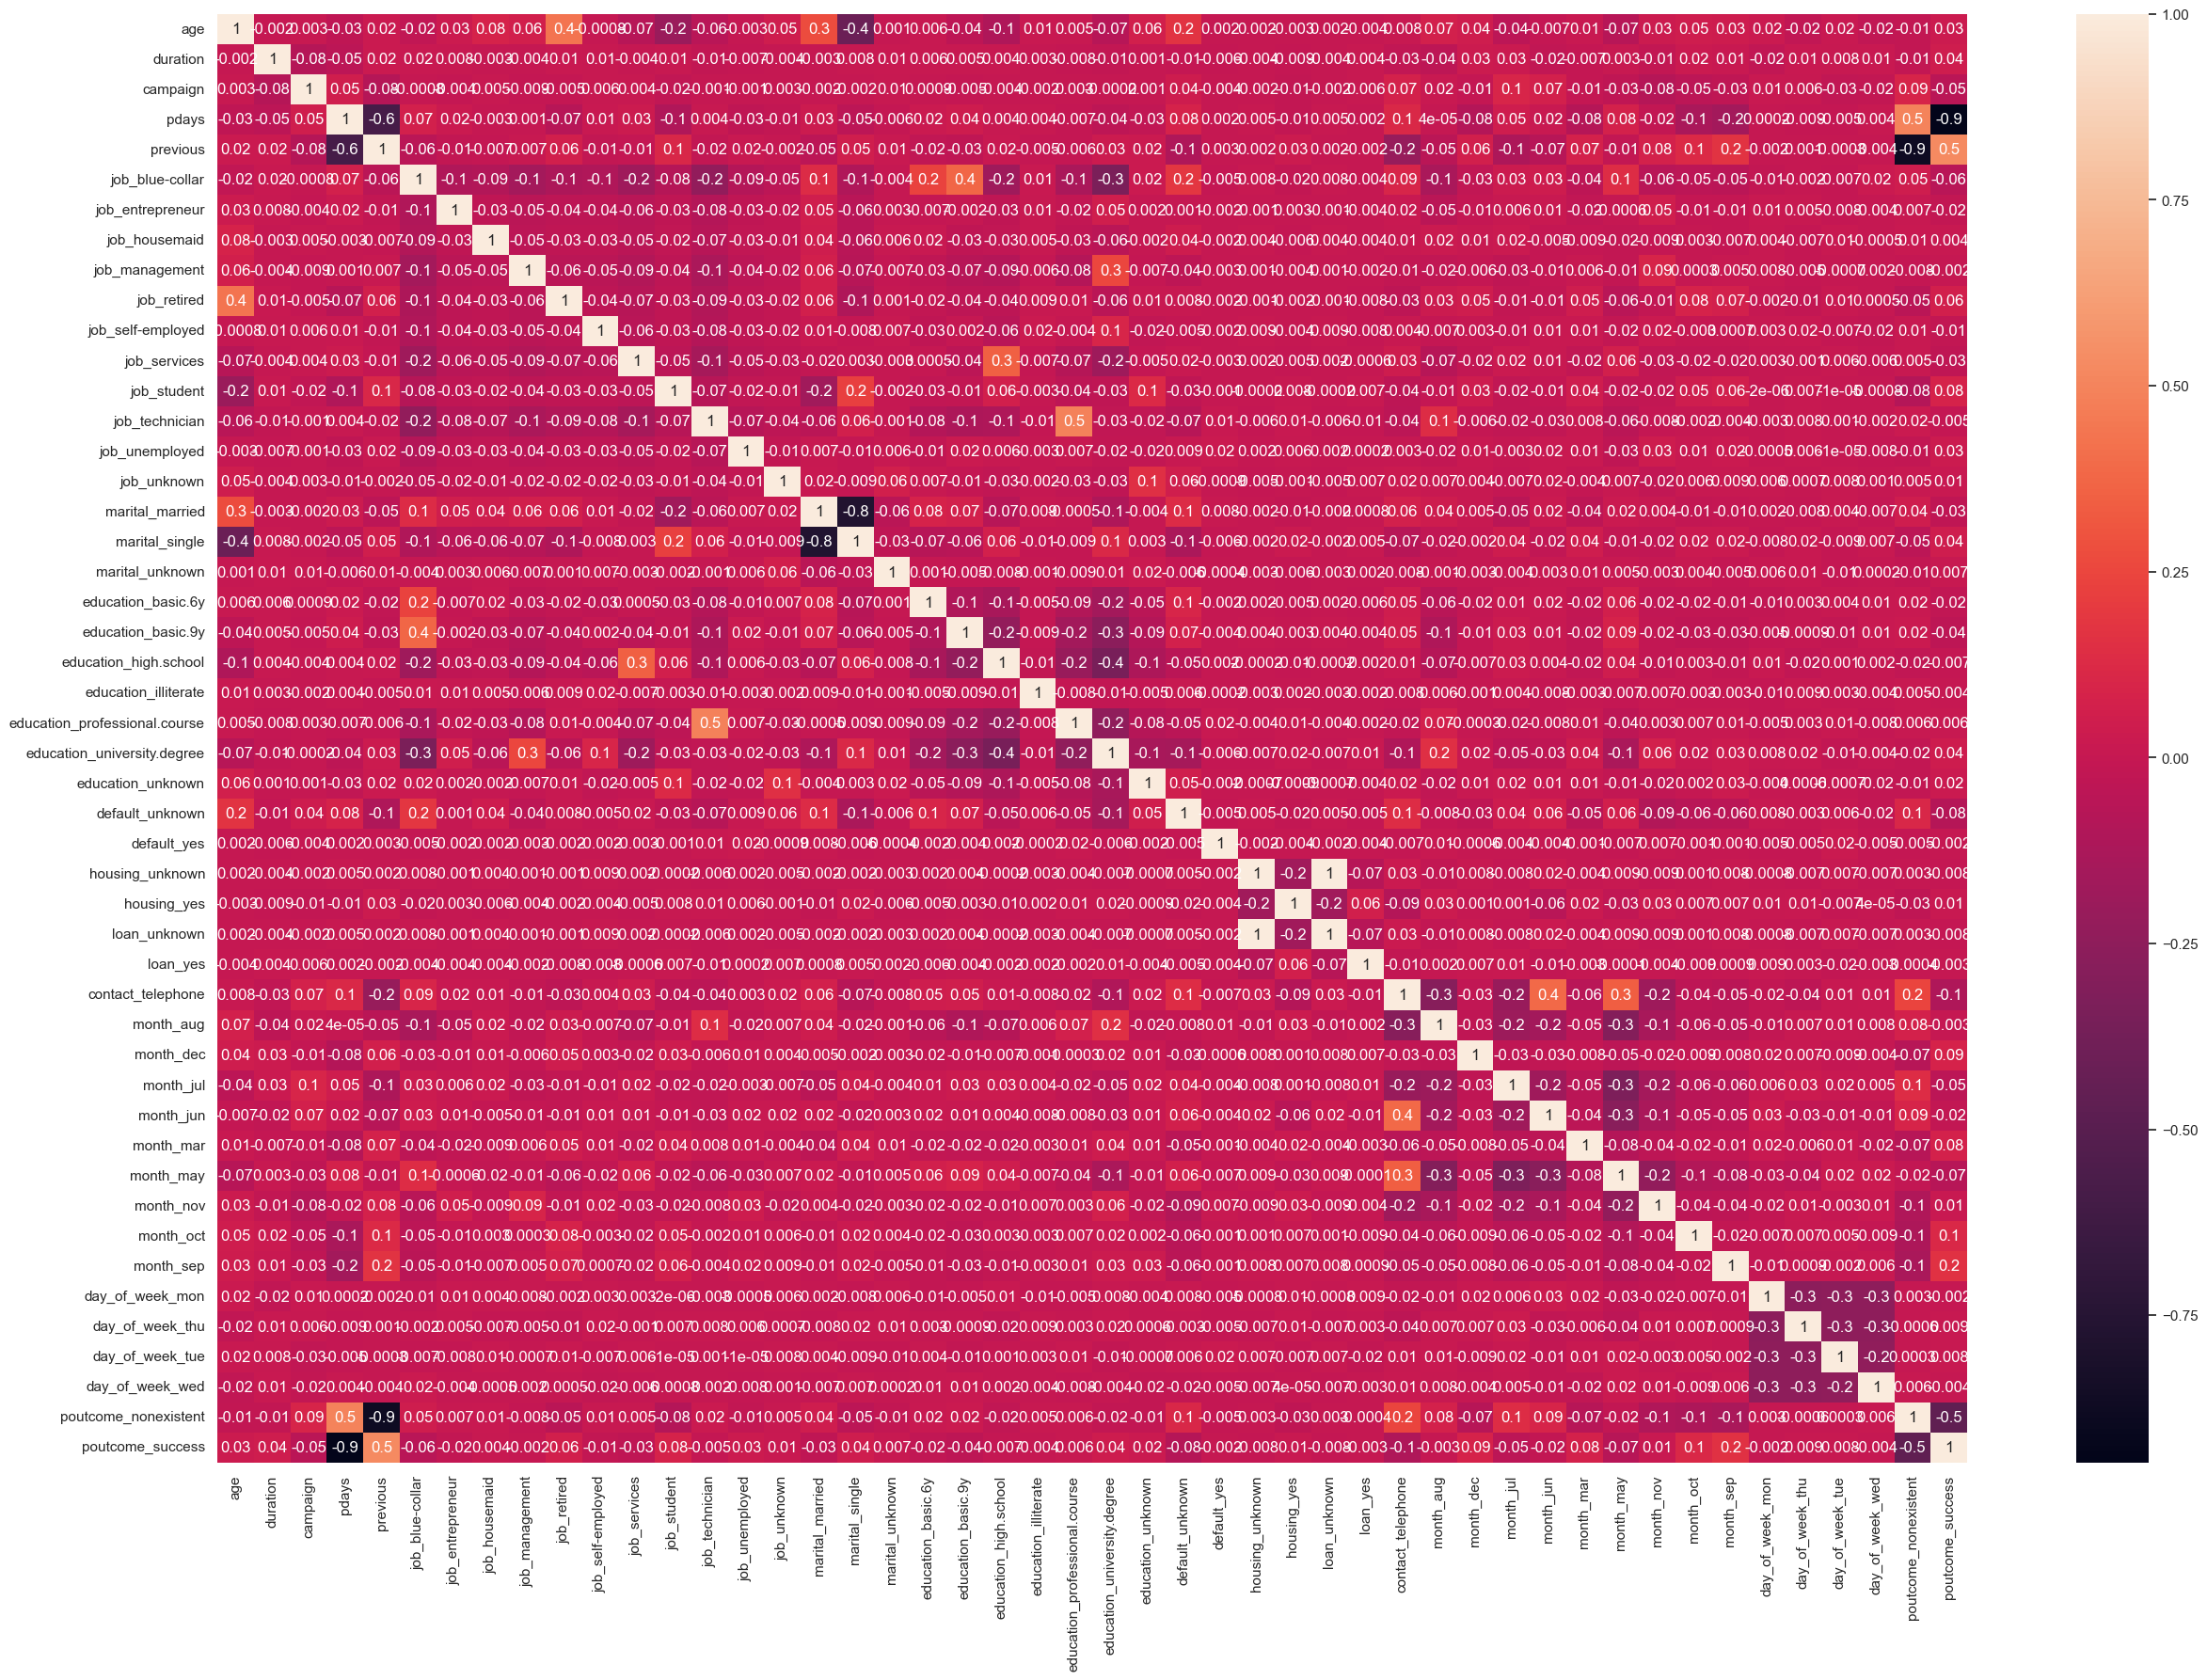

In [42]:
# Checking for multicollinearity
plt.figure(figsize = (30,20))
sns.heatmap(x.corr(),annot = True, fmt = '.1g')
plt.show()

### We could see the following pair of features are highly correlated 
#### pdays and poutcome_success
#### previous and poutcome_nonexistent
#### marital_married and marital_single

## Feature engineering

In [43]:
# checking for the important features using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x, y)
df_1 = pd.DataFrame({"Feature": x.columns, "RF_importance": rf.feature_importances_}).sort_values(by='RF_importance', ascending=False)
df_1

Feature  RF_importance
1                        duration   3.123042e-01
0                             age   1.236712e-01
3                           pdays   5.522390e-02
2                        campaign   5.132266e-02
47               poutcome_success   2.744825e-02
29                    housing_yes   2.468025e-02
4                        previous   2.108564e-02
32              contact_telephone   1.769200e-02
43                day_of_week_thu   1.671578e-02
31                       loan_yes   1.563613e-02
45                day_of_week_wed   1.563357e-02
42                day_of_week_mon   1.557271e-02
44                day_of_week_tue   1.544331e-02
37                      month_mar   1.478852e-02
16                marital_married   1.408326e-02
38                      month_may   1.380004e-02
40                      month_oct   1.356318e-02
21          education_high.school   1.352105e-02
24    education_university.degree   1.321177e-02
36                      month_jun   1.299313e-02
46           poutcome_nonexistent   1.264934e-02
13                 job_technician   1.251575e-02
35                      month_jul   1.192413e-02
17                 marital_single   1.148371e-02
33                      month_aug   1.099091e-02
39                      month_nov   1.021606e-02
26                default_unknown   1.020721e-02
41                      month_sep   1.010899e-02
23  education_professional.course   9.851637e-03
20             education_basic.9y   9.102354e-03
5                 job_blue-collar   8.964750e-03
8                  job_management   8.963301e-03
11                   job_services   7.232856e-03
9                     job_retired   6.535113e-03
25              education_unknown   6.388057e-03
12                    job_student   5.992252e-03
10              job_self-employed   5.471326e-03
19             education_basic.6y   5.282420e-03
14                 job_unemployed   5.106752e-03
6                job_entrepreneur   5.102560e-03
34                      month_dec   4.699949e-03
7                   job_housemaid   3.881374e-03
28                housing_unknown   2.947597e-03
30                   loan_unknown   2.913384e-03
15                    job_unknown   2.207263e-03
18                marital_unknown   6.088678e-04
22           education_illiterate   2.611636e-04
27                    default_yes   3.763804e-07

In [44]:
# checking for the important features using GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x, y)
df_2 = pd.DataFrame({"Feature": x.columns, "GB_importance": GB.feature_importances_}).sort_values(by='GB_importance', ascending=False)
df_2

Feature  GB_importance
1                        duration       0.500688
3                           pdays       0.228224
0                             age       0.057312
37                      month_mar       0.040408
32              contact_telephone       0.035382
40                      month_oct       0.029910
36                      month_jun       0.024817
41                      month_sep       0.013363
4                        previous       0.012593
38                      month_may       0.011641
26                default_unknown       0.007151
34                      month_dec       0.005566
12                    job_student       0.004821
35                      month_jul       0.004357
39                      month_nov       0.004304
2                        campaign       0.003080
24    education_university.degree       0.002817
5                 job_blue-collar       0.002743
47               poutcome_success       0.002649
46           poutcome_nonexistent       0.002158
33                      month_aug       0.001039
42                day_of_week_mon       0.001035
19             education_basic.6y       0.000766
15                    job_unknown       0.000519
43                day_of_week_thu       0.000506
17                 marital_single       0.000506
25              education_unknown       0.000289
45                day_of_week_wed       0.000239
14                 job_unemployed       0.000230
8                  job_management       0.000193
20             education_basic.9y       0.000175
13                 job_technician       0.000162
21          education_high.school       0.000093
22           education_illiterate       0.000083
29                    housing_yes       0.000076
11                   job_services       0.000076
31                       loan_yes       0.000029
10              job_self-employed       0.000000
27                    default_yes       0.000000
30                   loan_unknown       0.000000
7                   job_housemaid       0.000000
6                job_entrepreneur       0.000000
23  education_professional.course       0.000000
16                marital_married       0.000000
18                marital_unknown       0.000000
44                day_of_week_tue       0.000000
28                housing_unknown       0.000000
9                     job_retired       0.000000

In [45]:
# checking for the important features using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x, y)
df_3 = pd.DataFrame({"Feature": x.columns, "dt_importance": dt.feature_importances_}).sort_values(by='dt_importance', ascending=False)
df_3

Feature  dt_importance
1                        duration       0.341345
0                             age       0.125056
3                           pdays       0.110933
2                        campaign       0.044793
29                    housing_yes       0.020811
36                      month_jun       0.016080
32              contact_telephone       0.015671
40                      month_oct       0.015534
37                      month_mar       0.014983
43                day_of_week_thu       0.014044
21          education_high.school       0.013926
4                        previous       0.013923
38                      month_may       0.012654
31                       loan_yes       0.012395
24    education_university.degree       0.012331
16                marital_married       0.012269
44                day_of_week_tue       0.011958
13                 job_technician       0.011478
39                      month_nov       0.011457
17                 marital_single       0.011388
20             education_basic.9y       0.010825
42                day_of_week_mon       0.010793
8                  job_management       0.010084
35                      month_jul       0.009683
45                day_of_week_wed       0.009669
41                      month_sep       0.009523
33                      month_aug       0.009150
23  education_professional.course       0.008771
5                 job_blue-collar       0.008434
26                default_unknown       0.007970
25              education_unknown       0.006325
11                   job_services       0.005514
46           poutcome_nonexistent       0.005508
7                   job_housemaid       0.005368
34                      month_dec       0.005291
6                job_entrepreneur       0.005223
14                 job_unemployed       0.005054
12                    job_student       0.005003
19             education_basic.6y       0.004787
9                     job_retired       0.003771
10              job_self-employed       0.002962
30                   loan_unknown       0.002859
15                    job_unknown       0.001598
28                housing_unknown       0.001563
47               poutcome_success       0.000592
18                marital_unknown       0.000348
22           education_illiterate       0.000302
27                    default_yes       0.000000

In [46]:
# RF

# 19	education_basic.6y	0.005223
# 34	month_dec	0.004951
# 14	job_unemployed	0.004627
# 7	job_housemaid	0.003780
# 28	housing_unknown	0.002912
# 30	loan_unknown	0.002635
# 15	job_unknown	0.002425
# 18	marital_unknown	0.000597
# 22	education_illiterate	0.000319
# 27	default_yes	0.000003

# GBT
# 30	loan_unknown	0.000000
# 23	education_professional.course	0.000000
# 28	housing_unknown	0.000000
# 44	day_of_week_tue	0.000000
# 7	job_housemaid	0.000000
# 6	job_entrepreneur	0.000000
# 27	default_yes	0.000000
# 10	job_self-employed	0.000000
# 16	marital_married	0.000000
# 18	marital_unknown	0.000000
# 9	job_retired	0.000000

# DT
# 19	education_basic.6y	0.004427
# 9	job_retired	0.004068
# 10	job_self-employed	0.002528
# 28	housing_unknown	0.002149
# 15	job_unknown	0.001598
# 30	loan_unknown	0.001436
# 47	poutcome_success	0.000795
# 22	education_illiterate	0.000302
# 18	marital_unknown	0.000181
# 27	default_yes	0.000000

### When we compare the results for important features that we got from the above three methods, we could say that the features 'housing_unknown', 'loan_unknown', 'marital_unknown', and 'default_yes' are very least important

### Regarding the features which were highly correlated, we can remove these features ('marital_single', 'poutcome_nonexistent', 'poutcome_success') as they are least important when compared to others.

In [47]:
cols_to_remove = ['marital_single', 'poutcome_nonexistent', 'poutcome_success', 'housing_unknown',
                  'loan_unknown', 'marital_unknown', 'default_yes']

In [48]:
#dropping the features
x = x.drop(cols_to_remove, axis = 1)
x.head()

age  duration  campaign     pdays  previous  job_blue-collar  \
0  0.863914 -0.121089  0.522862  0.196609 -0.350175                1   
1 -0.289613 -0.216073 -0.203741  0.196609  1.653552                0   
2  3.651604  3.435021 -0.567042  0.196609 -0.350175                0   
3 -0.385740 -0.533459 -0.203741  0.196609 -0.350175                0   
4  1.825186  0.423332 -0.203741  0.196609 -0.350175                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  ...  \
0                 0              0               0            0  ...   
1                 1              0               0            0  ...   
2                 0              0               0            1  ...   
3                 0              0               0            0  ...   
4                 0              0               0            1  ...   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
0          0          0          0          1          0          0   
1          0          0          0          1          0          0   
2          0          0          0          0          0          0   
3          0          0          1          0          0          0   
4          1          0          0          0          0          0   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  
0                0                0                0                1  
1                0                0                0                1  
2                1                0                0                0  
3                1                0                0                0  
4                0                0                1                0  

[5 rows x 41 columns]

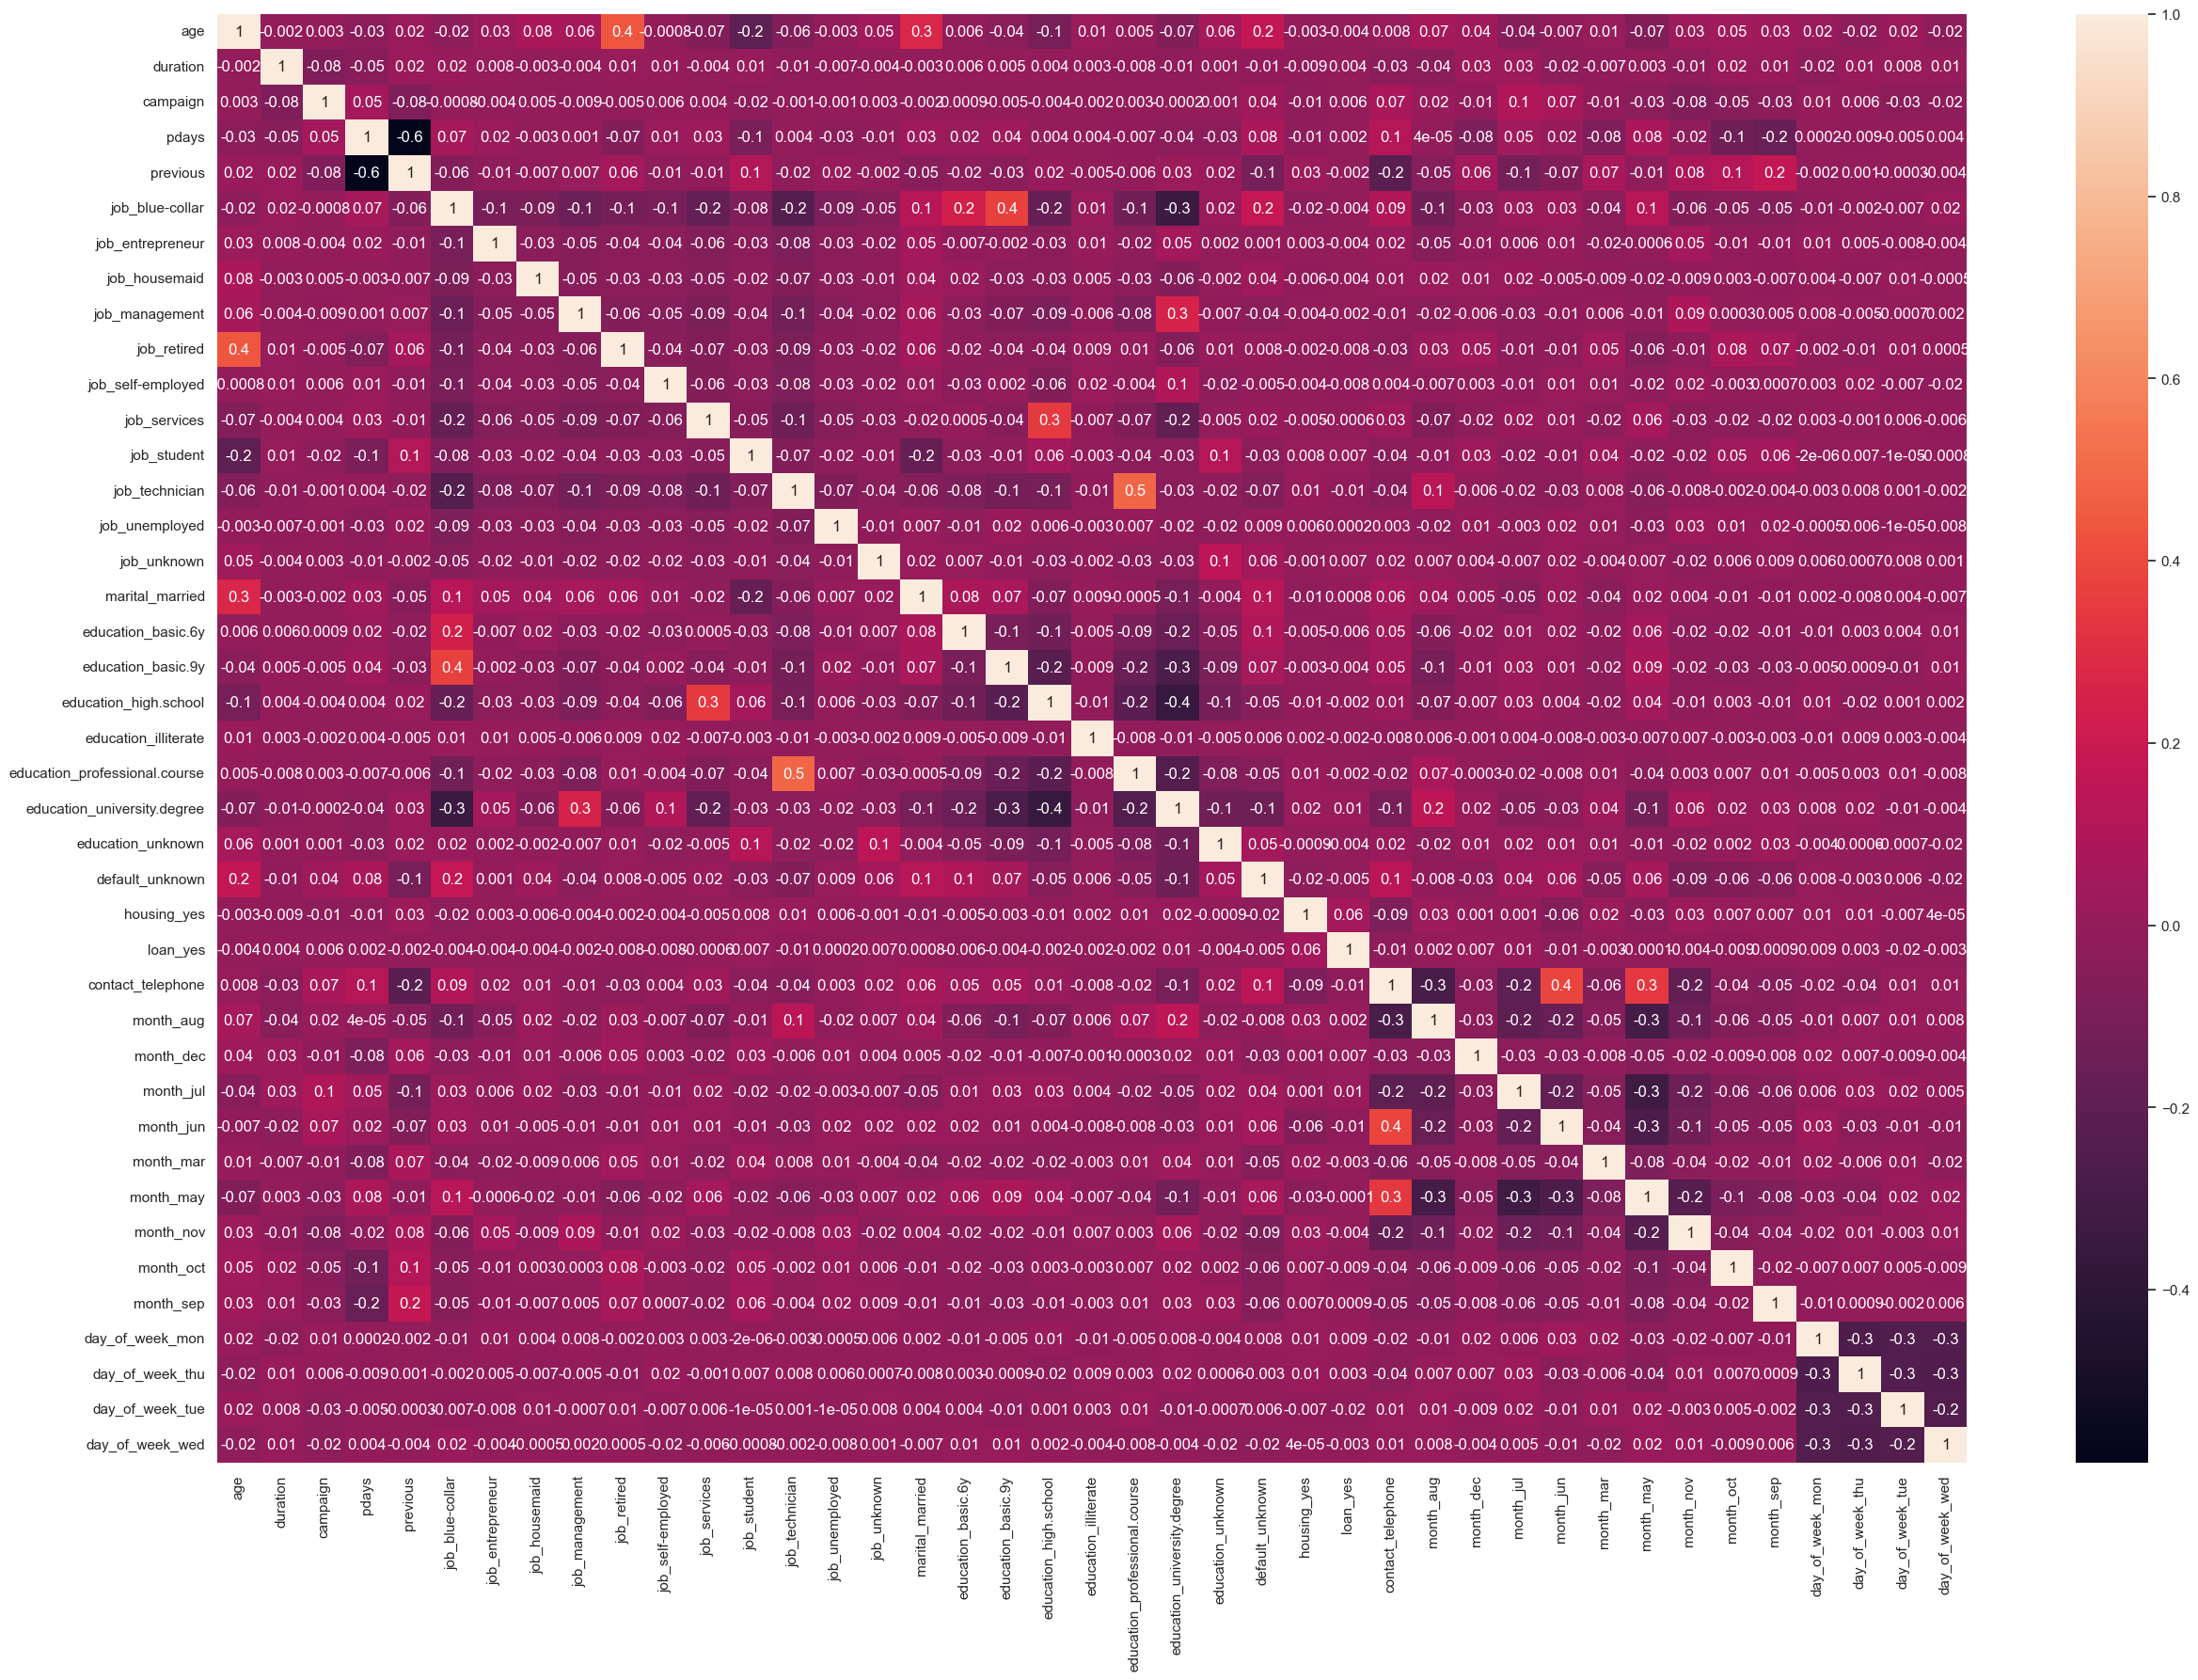

In [49]:
#checking the correlation using heatmap once again
plt.figure(figsize = (30,20))
sns.heatmap(x.corr(),annot = True, fmt = '.1g')
plt.show()

In [50]:
# Imbalance treatement
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print("Original value count :", y.value_counts())
print("*************SMOTE Method**********************")
print("After Smote value count :", y_smote.value_counts())

Original value count : 0    29230
1     3712
Name: y, dtype: int64
*************SMOTE Method**********************
After Smote value count : 0    29230
1    29230
Name: y, dtype: int64


In [51]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.20, random_state=42,
                                                    stratify=y_smote)

## Modelling

In [52]:
# import ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [54]:
# creating a user-defined function for prediction
def predict(ml_model):
    print('Model name: ', ml_model)
    model = ml_model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print('*'*30+"CLASSIFICATION_REPORT"+'*'*30)
    print(classification_report(y_train, train_pred))
    print('*'*80)
    print(classification_report(y_test, test_pred))
    print()
    print('*'*30+"CONFUSION_MATRIX"+'*'*30)
    print(confusion_matrix(y_train, train_pred))
    print('*'*80)
    print(confusion_matrix(y_test, test_pred))
    print()
    print('*'*15+"ACCURACY_SCORE"+'*'*15)
    print('Training:',accuracy_score(y_train, train_pred))
    print('*'*40)
    print('Testing:',accuracy_score(y_test, test_pred))
    print()
    print('*'*15+"F1_SCORE"+'*'*15)
    print('Training:',f1_score(y_train, train_pred))
    print('*'*40)
    print('Testing:',f1_score(y_test, test_pred))

In [55]:
predict(LogisticRegression())

Model name:  LogisticRegression()
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     23384
           1       0.89      0.89      0.89     23384

    accuracy                           0.89     46768
   macro avg       0.89      0.89      0.89     46768
weighted avg       0.89      0.89      0.89     46768

********************************************************************************
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      5846
           1       0.89      0.90      0.89      5846

    accuracy                           0.89     11692
   macro avg       0.89      0.89      0.89     11692
weighted avg       0.89      0.89      0.89     11692


******************************CONFUSION_MATRIX******************************
[[20771  2613]
 [ 2519 20865]]
****************************************

In [56]:
predict(RandomForestClassifier())

Model name:  RandomForestClassifier()
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23384
           1       1.00      1.00      1.00     23384

    accuracy                           1.00     46768
   macro avg       1.00      1.00      1.00     46768
weighted avg       1.00      1.00      1.00     46768

********************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5846
           1       0.92      0.96      0.94      5846

    accuracy                           0.94     11692
   macro avg       0.94      0.94      0.94     11692
weighted avg       0.94      0.94      0.94     11692


******************************CONFUSION_MATRIX******************************
[[23384     0]
 [    1 23383]]
************************************

In [57]:
predict(GradientBoostingClassifier())

Model name:  GradientBoostingClassifier()
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     23384
           1       0.89      0.93      0.91     23384

    accuracy                           0.91     46768
   macro avg       0.91      0.91      0.91     46768
weighted avg       0.91      0.91      0.91     46768

********************************************************************************
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      5846
           1       0.89      0.93      0.91      5846

    accuracy                           0.91     11692
   macro avg       0.91      0.91      0.91     11692
weighted avg       0.91      0.91      0.91     11692


******************************CONFUSION_MATRIX******************************
[[20785  2599]
 [ 1583 21801]]
********************************

In [58]:
predict(XGBClassifier())

Model name:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     23384
           1       0.96      0.97     

In [59]:
predict(SVC())

Model name:  SVC()
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.95      0.89      0.91     23384
           1       0.89      0.95      0.92     23384

    accuracy                           0.92     46768
   macro avg       0.92      0.92      0.92     46768
weighted avg       0.92      0.92      0.92     46768

********************************************************************************
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5846
           1       0.88      0.95      0.92      5846

    accuracy                           0.91     11692
   macro avg       0.91      0.91      0.91     11692
weighted avg       0.91      0.91      0.91     11692


******************************CONFUSION_MATRIX******************************
[[20698  2686]
 [ 1162 22222]]
*******************************************************

In [60]:
predict(DecisionTreeClassifier())

Model name:  DecisionTreeClassifier()
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23384
           1       1.00      1.00      1.00     23384

    accuracy                           1.00     46768
   macro avg       1.00      1.00      1.00     46768
weighted avg       1.00      1.00      1.00     46768

********************************************************************************
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      5846
           1       0.90      0.91      0.90      5846

    accuracy                           0.90     11692
   macro avg       0.90      0.90      0.90     11692
weighted avg       0.90      0.90      0.90     11692


******************************CONFUSION_MATRIX******************************
[[23384     0]
 [    0 23384]]
************************************

In [61]:
predict(AdaBoostClassifier())

Model name:  AdaBoostClassifier()
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     23384
           1       0.90      0.90      0.90     23384

    accuracy                           0.90     46768
   macro avg       0.90      0.90      0.90     46768
weighted avg       0.90      0.90      0.90     46768

********************************************************************************
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5846
           1       0.90      0.90      0.90      5846

    accuracy                           0.90     11692
   macro avg       0.90      0.90      0.90     11692
weighted avg       0.90      0.90      0.90     11692


******************************CONFUSION_MATRIX******************************
[[21015  2369]
 [ 2401 20983]]
****************************************

In [62]:
predict(KNeighborsClassifier())

Model name:  KNeighborsClassifier()
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     23384
           1       0.89      0.99      0.94     23384

    accuracy                           0.93     46768
   macro avg       0.94      0.93      0.93     46768
weighted avg       0.94      0.93      0.93     46768

********************************************************************************
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      5846
           1       0.85      0.98      0.91      5846

    accuracy                           0.91     11692
   macro avg       0.92      0.91      0.91     11692
weighted avg       0.92      0.91      0.91     11692


******************************CONFUSION_MATRIX******************************
[[20377  3007]
 [  187 23197]]
**************************************

In [63]:
predict(GaussianNB())

Model name:  GaussianNB()
******************************CLASSIFICATION_REPORT******************************
              precision    recall  f1-score   support

           0       0.86      0.56      0.68     23384
           1       0.67      0.91      0.77     23384

    accuracy                           0.73     46768
   macro avg       0.76      0.73      0.72     46768
weighted avg       0.76      0.73      0.72     46768

********************************************************************************
              precision    recall  f1-score   support

           0       0.86      0.56      0.68      5846
           1       0.68      0.91      0.78      5846

    accuracy                           0.74     11692
   macro avg       0.77      0.74      0.73     11692
weighted avg       0.77      0.74      0.73     11692


******************************CONFUSION_MATRIX******************************
[[13117 10267]
 [ 2220 21164]]
************************************************

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression().fit(x_train,y_train)
rf = RandomForestClassifier().fit(x_train,y_train)
gb = GradientBoostingClassifier().fit(x_train,y_train)
xgb = XGBClassifier().fit(x_train,y_train)
svm = SVC().fit(x_train,y_train)
dt = DecisionTreeClassifier().fit(x_train,y_train)
ab = AdaBoostClassifier().fit(x_train,y_train)
knn = KNeighborsClassifier().fit(x_train,y_train)
gnb = GaussianNB().fit(x_train,y_train)

In [65]:
lr_train_pred = lr.predict(x_train)
rf_train_pred = rf.predict(x_train)
gb_train_pred = gb.predict(x_train)
xgb_train_pred = xgb.predict(x_train)
svm_train_pred = svm.predict(x_train)
dt_train_pred = dt.predict(x_train)
ab_train_pred = ab.predict(x_train)
knn_train_pred = knn.predict(x_train)
gnb_train_pred = gnb.predict(x_train)

lr_test_pred = lr.predict(x_test)
rf_test_pred = rf.predict(x_test)
gb_test_pred = gb.predict(x_test)
xgb_test_pred = xgb.predict(x_test)
svm_test_pred = svm.predict(x_test)
dt_test_pred = dt.predict(x_test)
ab_test_pred = ab.predict(x_test)
knn_test_pred = knn.predict(x_test)
gnb_test_pred = gnb.predict(x_test)

lr_train_f1 = f1_score(y_train, lr_train_pred)
rf_train_f1 = f1_score(y_train, rf_train_pred)
gb_train_f1 = f1_score(y_train, gb_train_pred)
xgb_train_f1 = f1_score(y_train, xgb_train_pred)
svm_train_f1 = f1_score(y_train, svm_train_pred)
dt_train_f1 = f1_score(y_train, dt_train_pred)
ab_train_f1 = f1_score(y_train, ab_train_pred)
knn_train_f1 = f1_score(y_train, knn_train_pred)
gnb_train_f1 = f1_score(y_train, gnb_train_pred)

lr_test_f1 = f1_score(y_test, lr_test_pred)
rf_test_f1 = f1_score(y_test, rf_test_pred)
gb_test_f1 = f1_score(y_test, gb_test_pred)
xgb_test_f1 = f1_score(y_test, xgb_test_pred)
svm_test_f1 = f1_score(y_test, svm_test_pred)
dt_test_f1 = f1_score(y_test, dt_test_pred)
ab_test_f1 = f1_score(y_test, ab_test_pred)
knn_test_f1 = f1_score(y_test, knn_test_pred)
gnb_test_f1 = f1_score(y_test, gnb_test_pred)


point1 = ["Logistic", 'RForest','GradBoost','XGBoost','SVM','Dtree','AdaBoost','KNN','GausNB']
point2 = [lr_train_f1, rf_train_f1, gb_train_f1, xgb_train_f1, svm_train_f1, dt_train_f1, 
          ab_train_f1,knn_train_f1,gnb_train_f1]
point3 = [lr_test_f1, rf_test_f1, gb_test_f1, xgb_test_f1, svm_test_f1, dt_test_f1, ab_test_f1, knn_test_f1,
         gnb_test_f1]

final_output = pd.DataFrame({"Method Used": point1, "Training F1 Score":point2, "Testing F1 Score": point3})
print(final_output)

  Method Used  Training F1 Score  Testing F1 Score
0    Logistic           0.890487          0.893759
1     RForest           1.000000          0.944895
2   GradBoost           0.912481          0.908726
3     XGBoost           0.961839          0.936492
4         SVM           0.920318          0.915154
5       Dtree           1.000000          0.902501
6    AdaBoost           0.897937          0.899803
7         KNN           0.935589          0.912564
8      GausNB           0.772197          0.775817


In [66]:
final_output

Method Used  Training F1 Score  Testing F1 Score
0    Logistic           0.890487          0.893759
1     RForest           1.000000          0.944895
2   GradBoost           0.912481          0.908726
3     XGBoost           0.961839          0.936492
4         SVM           0.920318          0.915154
5       Dtree           1.000000          0.902501
6    AdaBoost           0.897937          0.899803
7         KNN           0.935589          0.912564
8      GausNB           0.772197          0.775817

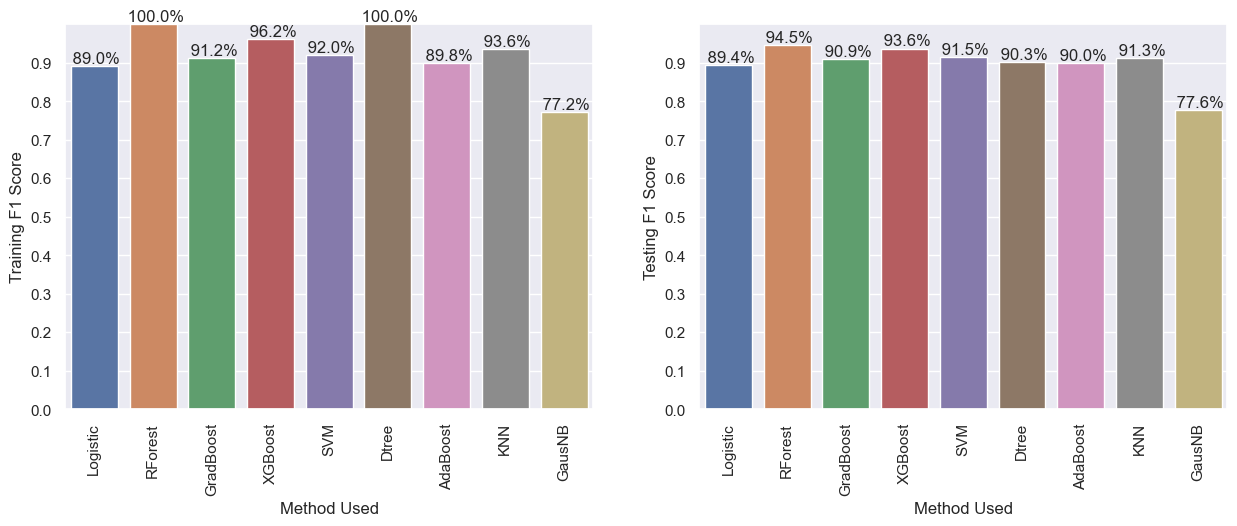

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax1 = sns.barplot(x="Method Used", y="Training F1 Score", data=final_output)
ax1.bar_label(ax1.containers[0], fmt = lambda x: f'{x*100 : 0.1f}%')
plt.xticks(rotation = 90)
plt.yticks(np.arange(0.0,1.0,0.1))
plt.ylim(0,1)
plt.subplot(1,2,2)
ax2 = sns.barplot(x="Method Used", y="Testing F1 Score", data=final_output)
ax2.bar_label(ax2.containers[0], fmt = lambda x: f'{x*100 : 0.1f}%')
plt.xticks(rotation = 90)
plt.yticks(np.arange(0.0,1.0,0.1))
plt.ylim(0,1)
plt.show()

### While comparing the F1 scores of all the models that we have built, we can say that Random Forest has performed well

## Stacking classifier

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [69]:
estimators = [('lr',LogisticRegression()),
             ('gbt', GradientBoostingClassifier()),
             ('xgb', XGBClassifier()),
             ('svm', SVC()),
             ('dt',DecisionTreeClassifier()),
             ('abst',AdaBoostClassifier()),
             ('knn',KNeighborsClassifier()),
             ('gnb',GaussianNB())]

In [70]:
from sklearn.ensemble import StackingClassifier

In [71]:
classifier = StackingClassifier(estimators = estimators,final_estimator = RandomForestClassifier(),
                                cv = 10)

In [72]:
sclassifier = classifier.fit(x_train,y_train)

In [73]:
stacking_train_pred = classifier.predict(x_train)
stacking_test_pred = classifier.predict(x_test)

print("********Stacking Classification Report*********")
print(classification_report(y_train, stacking_train_pred))
print()
print(classification_report(y_test, stacking_test_pred))
print()
print("********Stacking Confusion Matrix*********")
print(confusion_matrix(y_train, stacking_train_pred))
print()
print(confusion_matrix(y_test, stacking_test_pred))
print()
print("********Stacking Accuracy Score*********")
print(accuracy_score(y_train, stacking_train_pred))
print()
print(accuracy_score(y_test, stacking_test_pred))
print()
print("********Stacking F1 Score*********")
print(f1_score(y_train, stacking_train_pred))
print()
print(f1_score(y_test, stacking_test_pred))
print()

********Stacking Classification Report*********
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     23384
           1       0.99      0.98      0.99     23384

    accuracy                           0.99     46768
   macro avg       0.99      0.99      0.99     46768
weighted avg       0.99      0.99      0.99     46768


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5846
           1       0.94      0.95      0.94      5846

    accuracy                           0.94     11692
   macro avg       0.94      0.94      0.94     11692
weighted avg       0.94      0.94      0.94     11692


********Stacking Confusion Matrix*********
[[23163   221]
 [  429 22955]]

[[5478  368]
 [ 292 5554]]

********Stacking Accuracy Score*********
0.9861016079370509

0.9435511460827917

********Stacking F1 Score*********
0.9860395189003437

0.9439157036029912



### Finalsing the StackingClassifier model as we have got test F1-Score of 0.9439